<h2><center>Title: Prediction of Mood Disorders among DASS Survey Participants</center></h2>

<h3><center>WQD7003: Data Analytics (Assignment)</center></h3>
<h4><center>Group 6</center></h4>
<table>
  <tr>
    <th>No.</th>
    <th>Name</th>
    <th>Matric Number</th>
  </tr>
  <tr>
    <td>1.</td>
    <td>Amy Amanda Lang Pooi Mun</td>
    <td>S2127213</td>
  </tr>
  <tr>
    <td>2.</td>
    <td>Prasanta A/L Sathasivam</td>
    <td>17157826</td>
  </tr>
  <tr>
    <td>3.</td>
    <td>Sharmini Joseph Pereira</td>
    <td>S2114594</td>
  </tr>
  <tr>
    <td>4.</td>
    <td>Soon Jin Sim</td>
    <td>S2043577</td>
  </tr>
</table>

## Index (PART 1)
* [Introduction](#intro)
* [Business Goal](#goal1)
* [Data Mining Goal](#goal2)
* [Initial Questions](#questions)
* [Overview & Motivation](#overview)
* [Related Work](#table)
* [Import Dependencies](#import)
* [Data Import](#data_collection)
* [Data Preprocessing](#data_preprocessing)
 - [Data Cleaning](#data_cleaning)
     - [Cleaning Part 1](#data_cleaning_part1)
     - [Cleaning Part 2](#data_cleaning_part2)
 - [Data Discretization](#noise)
     - [Smoothing by Bin Median](#median)
* [References](#ref)

## Index (PART 2)
* [EDA](#EDA)
* [Question 1](#question_3)
* [Question 2](#question_1)
* [Question 3](#question_2)
* [Question 4](#question_4)

<a class="anchor" id="overview"></a>

## Overview and Motivation

<p>The Covid-19 pandemic has changed many lives globally and has been negatively affecting the public's mental health as people are facing issues like bereavement, isolation, loss of income and many more. We have seen several cases whereby individuals caught attempting suicide or even worse committed suicide due to many different reasons. What's more worrying is that several individuals who look and behave normally are facing these issues as well. That shows mental health problems or mood disorders in people are often goes undetected. On top of that, according to WHO, there seems to be lack of critical mental health services to cope with the growing demand as countries only spending less than 2% of their national health budgets on mental health.</p>

<p>Hence, we would be utilizing the data from the Depression Anxiety Stress Scales (DASS) survey to predict individuals who are more likely to face symptoms of depression, anxiety and stress, where it could then be used by professionals for clinical diagnosis. As the DASS survey may be administered and scored by non-psychologists, it is suitable for screening the respondents for research purposes.</p>

<a class="anchor" id="questions"></a>

## Initial Questions 

<ol>
<li>What are the age groups that are more likely to face depression, anxiety or stress?</li>
<li>What are the indicators of depression, anxiety or stress among the respondents?</li>
<li>What is the correlation between depression, anxiety and stress based on the dataset?</li>
<li>Which individuals are going to undergo depression, anxiety or stress in the future?</li>
</ol>

<a class="anchor" id="goal1"></a>

## Business Goal 

<ol>
<li>Detecting depression, anxiety, stress levels to prevent societal problems.</li>
</ol>

<a class="anchor" id="goal2"></a>

## Data Mining Goals 

<ol>
<li>Identifying current psychology state of the survey respondents using their given answers</li>
<li>Forecasting the potential mood disorders based on their survey responses</li>
</ol>

<a class="anchor" id="intro"></a>

## Dataset

<p>In the <a href="https://www.kaggle.com/yamqwe/depression-anxiety-stress-scales">dataset</a> that we are about to explore, the data as collected using an online platform of the Depression Anxiety Stress Scales (DASS) to the public with the consent of providing their answers in a research survey given at the end of the DASS survey. The data collected is from the year 2017 to 2019.<br>
Some examples of the questions in the survey that are given in a random order:<br>
<br>
Q1: I found myself getting upset by quite trivial things.<br>
Q2: I was aware of dryness of my mouth.<br>
Q3: I couldn't seem to experience any positive feeling at all.<br>
<br>
Which the participant will rank with a 4-point scale rating:<br>
1 = Did not apply to me at all<br>
2 = Applied to me to some degree, or some of the time<br>
3 = Applied to me to a considerable degree, or a good part of the time<br>
4 = Applied to me very much, or most of the time<br>
<br>
Which indicates how frequent the question applies to them in the past week.<p>

<a class="anchor" id="table"></a>

## Related Work 

![](table.png)

<a class="anchor" id="import"></a>

## Import Dependencies

!pip install missingno

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
from scipy.stats import stats, binned_statistic, ttest_rel, chi2_contingency 
import seaborn as sns
import sys
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB 
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from matplotlib.pyplot import figure, pie, axis, show
from pandas import DataFrame, read_csv, Series
import statsmodels.stats.multicomp as mc
import scipy.stats as stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

<a class="anchor" id="data_collection"></a>

## Data Import 

In [2]:
df = pd.read_csv('archive/DASS_data_21.02.19/data.csv', sep='\t')
df.head()

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major
0,4,28,3890,4,25,2122,2,16,1944,4,...,1,1,1,12,1,10,2,1,2,NaN
1,4,2,8118,1,36,2890,2,35,4777,3,...,2,1,2,7,0,70,2,1,4,NaN
2,3,7,5784,1,33,4373,4,41,3242,1,...,2,1,1,4,3,60,1,1,3,NaN
3,2,23,5081,3,11,6837,2,37,5521,1,...,2,1,2,4,5,70,2,1,5,biology
4,2,36,3215,2,13,7731,3,5,4156,4,...,2,2,3,10,1,10,2,1,4,Psychology


In [3]:
df.dtypes

Q1A            int64
Q1I            int64
Q1E            int64
Q2A            int64
Q2I            int64
               ...  
race           int64
voted          int64
married        int64
familysize     int64
major         object
Length: 172, dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39775 entries, 0 to 39774
Columns: 172 entries, Q1A to major
dtypes: int64(170), object(2)
memory usage: 52.2+ MB


<a class="anchor" id="data_preprocessing"></a>

## Data Pre-processing <a class="anchor" id="data_cleaning"></a> 

### Data Cleaning 

In [5]:
df.isna()

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39770,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
39771,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
39772,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
39773,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
df.isna().sum()

Q1A               0
Q1I               0
Q1E               0
Q2A               0
Q2I               0
              ...  
race              0
voted             0
married           0
familysize        0
major         11403
Length: 172, dtype: int64

In [7]:
sum(df.isna().sum())

11405

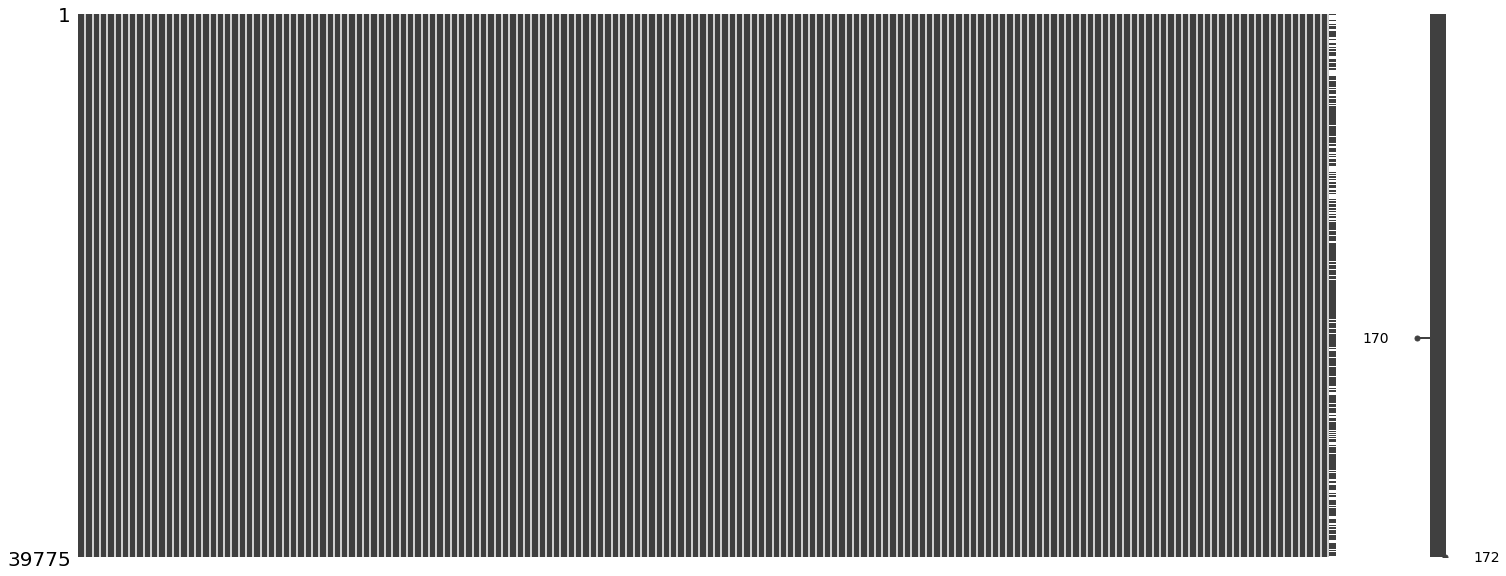

In [8]:
msno.matrix(df)
plt.show()
#plt.savefig('missing.png')

In [9]:
df.describe()

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,age,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize
count,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,...,39775.000000,39775.000000,39775.000000,39775.00000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000
mean,2.619485,21.555977,6.970591e+03,2.172269,21.248070,5.332376e+03,2.226097,21.583004,7.426446e+03,1.950170,...,23.612168,1.274519,1.200025,1.13516,7.555852,1.642992,31.312885,1.705795,1.159547,3.510270
std,1.032117,12.133621,8.670513e+04,1.111563,12.125288,2.651361e+04,1.038526,12.115637,1.587024e+05,1.042218,...,21.581722,0.446277,0.400024,0.40030,3.554395,1.351362,25.871272,0.473388,0.445882,2.141518
min,1.000000,1.000000,1.800000e+02,1.000000,1.000000,1.760000e+02,1.000000,1.000000,-1.081400e+04,1.000000,...,13.000000,1.000000,1.000000,0.00000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000
25%,2.000000,11.000000,2.664000e+03,1.000000,11.000000,2.477000e+03,1.000000,11.000000,2.857000e+03,1.000000,...,18.000000,1.000000,1.000000,1.00000,4.000000,1.000000,10.000000,1.000000,1.000000,2.000000
50%,3.000000,22.000000,3.609000e+03,2.000000,21.000000,3.511000e+03,2.000000,22.000000,3.898000e+03,2.000000,...,21.000000,1.000000,1.000000,1.00000,10.000000,1.000000,10.000000,2.000000,1.000000,3.000000
75%,4.000000,32.000000,5.358000e+03,3.000000,32.000000,5.216000e+03,3.000000,32.000000,5.766000e+03,3.000000,...,25.000000,2.000000,1.000000,1.00000,10.000000,2.000000,60.000000,2.000000,1.000000,4.000000
max,4.000000,42.000000,1.210228e+07,4.000000,42.000000,2.161057e+06,4.000000,42.000000,2.858269e+07,4.000000,...,1998.000000,2.000000,2.000000,3.00000,12.000000,5.000000,70.000000,2.000000,3.000000,133.000000


<a class="anchor" id="data_cleaning_part1"></a>

### Data Cleaning (Replacing Missing Values in Major Column) 

In [10]:
df['major'] = df['major'].fillna('Unknown')

In [11]:
df.isna().sum()

Q1A           0
Q1I           0
Q1E           0
Q2A           0
Q2I           0
             ..
race          0
voted         0
married       0
familysize    0
major         0
Length: 172, dtype: int64

In [12]:
sum(df.isna().sum())

2

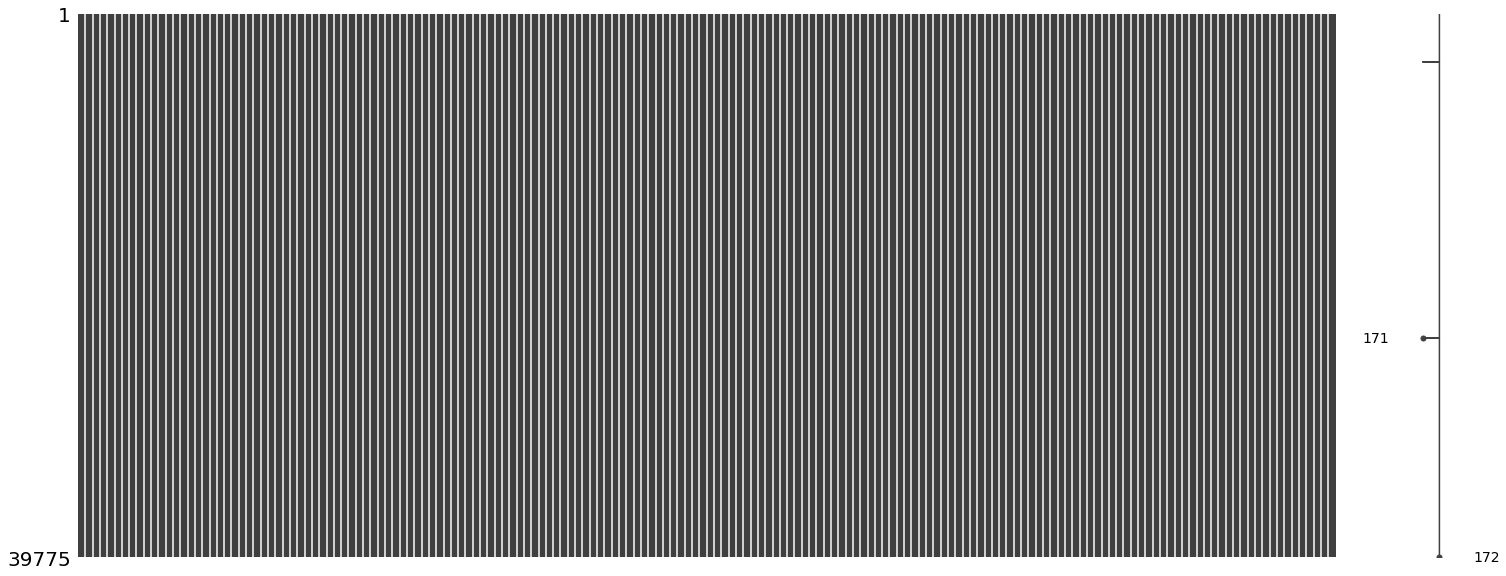

In [13]:
msno.matrix(df)
plt.show()

<a class="anchor" id="data_cleaning_part2"></a>

### Data Cleaning (Replacing Missing Values in Country Column) 

In [14]:
df.columns[df.isnull().any()]

Index(['country'], dtype='object')

In [15]:
null_data = df[df.isnull().any(axis=1)]

In [16]:
null_data

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major
3526,2,41,2104,3,38,1710,2,29,2036,2,...,2,1,1,3,3,60,2,3,2,Industrial and Organisational Psychology
23744,1,11,3330,4,38,3162,4,34,3164,2,...,1,1,1,1,2,60,2,1,3,Unknown


In [17]:
null_data.loc[:, :'country']

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,Q40A,Q40I,Q40E,Q41A,Q41I,Q41E,Q42A,Q42I,Q42E,country
3526,2,41,2104,3,38,1710,2,29,2036,2,...,1,31,3050,1,27,1598,2,1,48933,NaN
23744,1,11,3330,4,38,3162,4,34,3164,2,...,2,30,3833,3,41,2330,4,2,5156,NaN


In [18]:
df['country'] = df['country'].fillna('NONE')

In [19]:
sum(df.isna().sum())

0

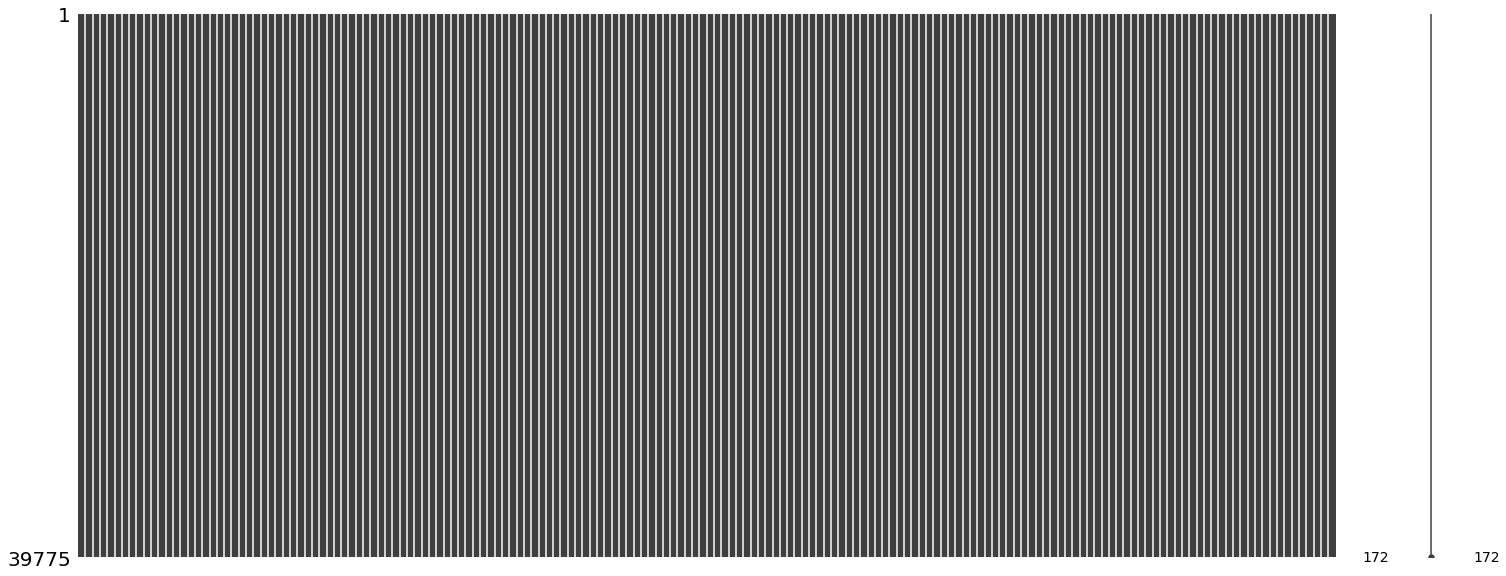

In [20]:
msno.matrix(df)
plt.show()

<a class="anchor" id="noise"></a>

## Data Discretization <a class="anchor" id="median"></a>

### Data Smoothing by Bin Median 

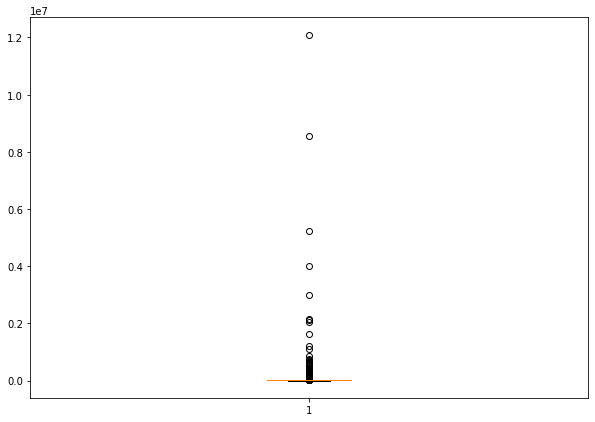

In [21]:
fig = plt.figure(figsize =(10, 7))
plt.boxplot(df['Q1E'])
plt.show()

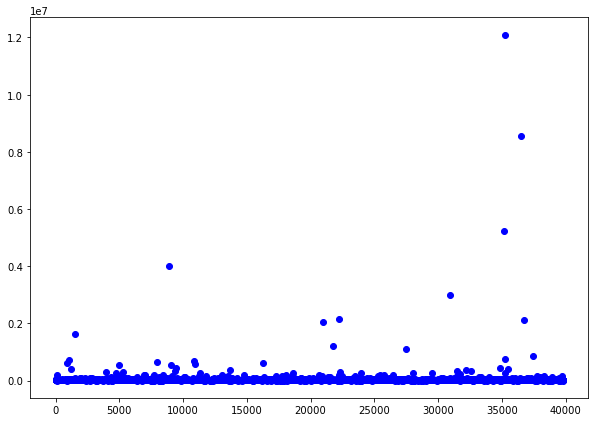

In [22]:
fig = plt.figure(figsize =(10, 7))
x_data = np.arange(0, len(df))
y_data = df['Q1E']
plt.scatter(x_data, y_data, c ="blue")
plt.show()

In [23]:
x_data = np.arange(0, len(df))
y_data = df['Q1E']
x_bins,bin_edges, misc = binned_statistic(y_data,x_data, statistic="median")

In [24]:
bin_intervals = pd.IntervalIndex.from_arrays(bin_edges[:-1], bin_edges[1:])

In [25]:
def set_to_median(x, bin_intervals):
    for interval in bin_intervals:
        if x in interval:
            return interval.mid

In [26]:
df['sampled_Q1E'] = df['Q1E'].apply(lambda x: set_to_median(x, bin_intervals))

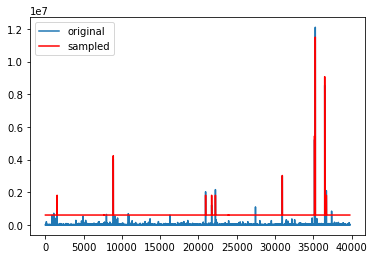

In [27]:
plt.plot(df['Q1E'], label='original')
plt.plot(df['sampled_Q1E'], color='red', label='sampled')
plt.legend()
plt.show()

In [28]:
y_bins = (bin_edges[:-1]+bin_edges[1:])/2
y_bins

array([  605285.1,  1815495.3,  3025705.5,  4235915.7,  5446125.9,
        6656336.1,  7866546.3,  9076756.5, 10286966.7, 11497176.9])

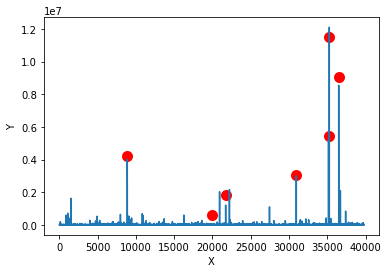

In [29]:
plt.plot(x_data,y_data)
plt.xlabel("X"); 
plt.ylabel("Y")
plt.scatter(x_bins, y_bins,  color= 'red',linewidth=5)
plt.show()

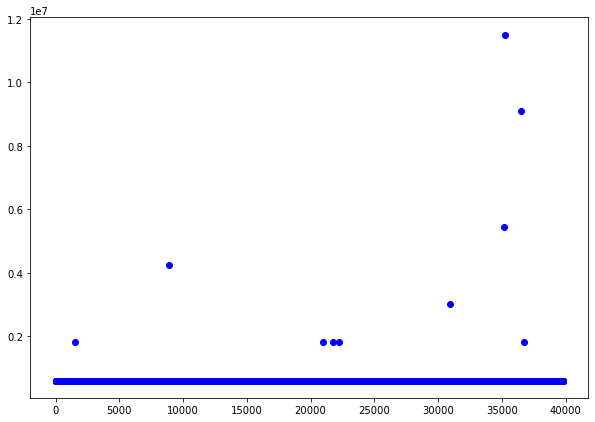

In [30]:
fig = plt.figure(figsize =(10, 7))
x_data = np.arange(0, len(df))
y_data = df['sampled_Q1E']
plt.scatter(x_data, y_data, c ="blue")
plt.show()

In [31]:
df = df.drop(['sampled_Q1E','introelapse','testelapse','surveyelapse'], axis=1)

In [32]:
for n in range(42):
    df = df.drop('Q'+str(n+1)+'E', axis=1)

In [33]:
depression_scores = []
depression_questions = [3, 5, 10, 13, 16, 17, 21, 24, 26, 31, 34, 37, 38, 42]
for i in range(len(df)):
    total = 0
    for question in depression_questions:
        total = total + df['Q'+str(question)+'A'][i]
    depression_scores.append(total)

In [34]:
anxiety_scores = []
anxiety_questions = [2, 4, 7, 9, 15, 19, 20, 23, 25, 28, 30, 36, 40, 41]
for i in range(len(df)):
    total = 0
    for question in anxiety_questions:
        total = total + df['Q'+str(question)+'A'][i]
    anxiety_scores.append(total)

In [35]:
stress_scores = []
stress_questions = [1, 6, 8, 11, 12, 14, 18, 22, 27, 29, 32, 33, 35, 39]
for i in range(len(df)):
    total = 0
    for question in stress_questions:
        total = total + df['Q'+str(question)+'A'][i]
    stress_scores.append(total)

In [36]:
depression_status = []
for score in depression_scores:
    if score >= 0 and score <= 9:
        depression_status.append('Normal')
    elif score >= 10 and score <= 13:
        depression_status.append('Mild')
    elif score >= 14 and score <= 20:
        depression_status.append('Moderate')
    elif score >= 21 and score <= 27:
        depression_status.append('Severe')
    elif score >= 28:
        depression_status.append('Extremely Severe')

In [37]:
anxiety_status = []
for score in anxiety_scores:
    if score >= 0 and score <= 7:
        anxiety_status.append('Normal')
    elif score >= 8 and score <= 9:
        anxiety_status.append('Mild')
    elif score >= 10 and score <= 14:
        anxiety_status.append('Moderate')
    elif score >= 15 and score <= 19:
        anxiety_status.append('Severe')
    elif score >= 20:
        anxiety_status.append('Extremely Severe')

In [38]:
stress_status = []
for score in stress_scores:
    if score >= 0 and score <= 14:
        stress_status.append('Normal')
    elif score >= 15 and score <= 18:
        stress_status.append('Mild')
    elif score >= 19 and score <= 25:
        stress_status.append('Moderate')
    elif score >= 26 and score <= 33:
        stress_status.append('Severe')
    elif score >= 34:
        stress_status.append('Extremely Severe')

In [39]:
df['depression_scores'] = depression_scores
df['anxiety_scores'] = anxiety_scores
df['stress_scores'] = stress_scores
df['depression_status'] = depression_status
df['anxiety_status'] = anxiety_status
df['stress_status'] = stress_status

In [40]:
import copy
temp = copy.deepcopy(df)

<a class="anchor" id="EDA"></a>

## Exploratory Data Analysis

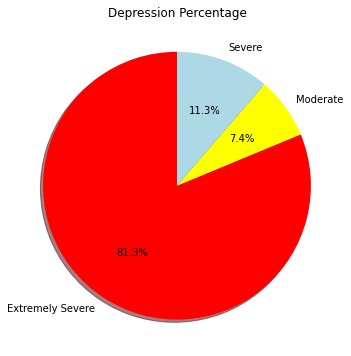

In [217]:
fig = plt.figure(1, figsize=(6,6))
ax = fig.add_subplot(111)
sums = df.groupby(df["depression_status"])["depression_scores"].sum()
axis('equal');
colors = ["red","yellow","lightblue","green"]
pie(sums, labels=sums.index, colors=colors,autopct='%.1f%%',shadow=True, startangle=90);
plt.title('Depression Percentage')
show()

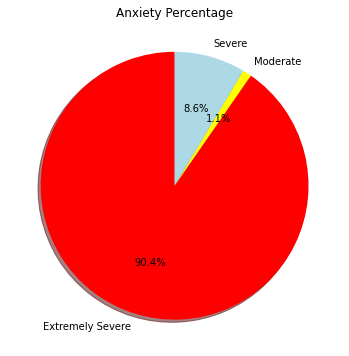

In [218]:
df= pd.read_csv('modified_dataset.csv')
fig = plt.figure(1, figsize=(6,6))
ax = fig.add_subplot(111)
sums = df.groupby(df["anxiety_status"])["anxiety_scores"].sum()
axis('equal');
colors = ["red","yellow","lightblue","green",]
pie(sums, labels=sums.index, colors=colors,autopct='%.1f%%',shadow=True, startangle=90);
plt.title('Anxiety Percentage')
show()

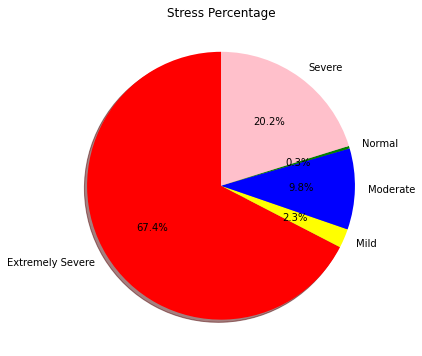

In [220]:
fig = plt.figure(1, figsize=(6,6))
ax = fig.add_subplot(111)
sums = df.groupby(df["stress_status"])["stress_scores"].sum()
axis('equal');
colors = ["red","yellow","blue","green", "pink"]
pie(sums, labels=sums.index, colors=colors,autopct='%.1f%%',shadow=True, startangle=90);
plt.title('Stress Percentage')
show()

In [226]:
df['gender'].replace({1: "Male", 2:"Female", 3:"Other"})

0        Female
1        Female
2        Female
3        Female
4        Female
          ...  
39770      Male
39771      Male
39772    Female
39773    Female
39774    Female
Name: gender, Length: 39775, dtype: object

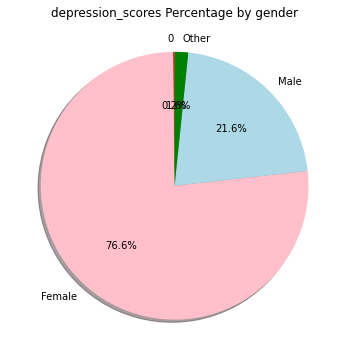

In [231]:
temp1 = copy.deepcopy(df)
temp1['gender'].replace({1: "Male", 2:"Female", 3:"Other"}, inplace=True)
fig = plt.figure(1, figsize=(6,6))
ax = fig.add_subplot(111)
sums = df.groupby(temp1["gender"])["depression_scores"].sum()
axis('equal');
colors = ["red","pink","lightblue","green"]
pie(sums, labels=sums.index, colors=colors,autopct='%.1f%%',shadow=True, startangle=90);
plt.title('depression_scores Percentage by gender')
show()

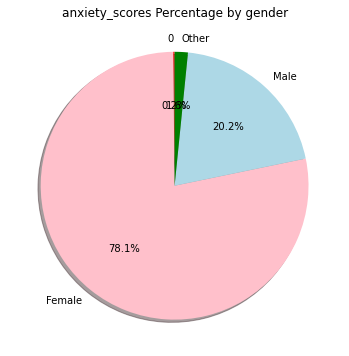

In [233]:
fig = plt.figure(1, figsize=(6,6))
ax = fig.add_subplot(111)
sums = df.groupby(temp1["gender"])["anxiety_scores"].sum()
axis('equal');
colors = ["red","pink","lightblue","green",]
pie(sums, labels=sums.index, colors=colors,autopct='%.1f%%',shadow=True, startangle=90);
plt.title('anxiety_scores Percentage by gender')
show()

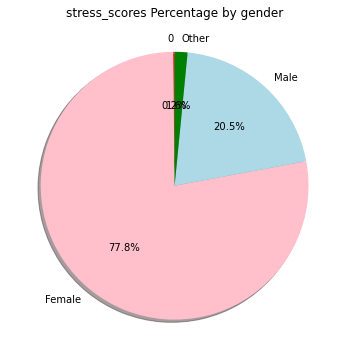

In [235]:
fig = plt.figure(1, figsize=(6,6))
ax = fig.add_subplot(111)
sums = df.groupby(temp1["gender"])["stress_scores"].sum()
axis('equal');
colors = ["red","pink","lightblue","green"]
pie(sums, labels=sums.index, colors=colors,autopct='%.1f%%',shadow=True, startangle=90);
plt.title('stress_scores Percentage by gender')
show()

<a class="anchor" id="question_3"></a>

# Question 1

### What are the age groups that are more likely to face depression, anxiety or stress?

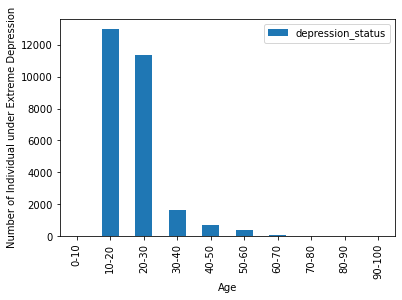

In [301]:
data = pd.read_csv('modified_dataset.csv')
data['age_bin'] = pd.cut(data['age'], bins=range(0,101,10), labels=[f'{l}-{l+10}' for l in range(0,91,10)])
data = data[data['depression_status']=='Extremely Severe']
data.pivot_table(values = 'depression_status', index = 'age_bin', aggfunc='count').plot(kind='bar')
plt.xlabel("Age")
plt.ylabel("Number of Individual under Extreme Depression")
plt.show()

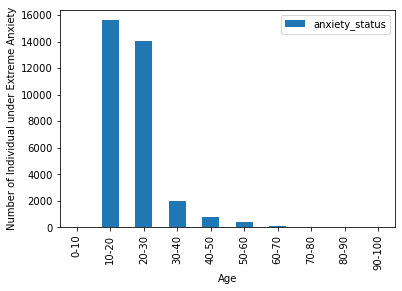

In [302]:
data = pd.read_csv('modified_dataset.csv')
data['age_bin'] = pd.cut(data['age'], bins=range(0,101,10), labels=[f'{l}-{l+10}' for l in range(0,91,10)])
data = data[data['anxiety_status']=='Extremely Severe']
data.pivot_table(values = 'anxiety_status', index = 'age_bin', aggfunc='count').plot(kind='bar')
plt.xlabel("Age")
plt.ylabel("Number of Individual under Extreme Anxiety")
plt.show()

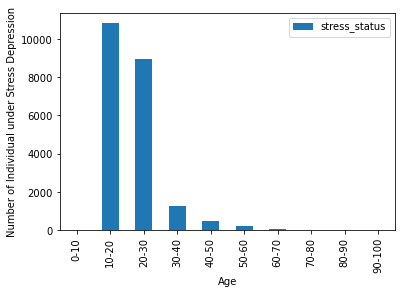

In [300]:
data = pd.read_csv('modified_dataset.csv')
data['age_bin'] = pd.cut(data['age'], bins=range(0,101,10), labels=[f'{l}-{l+10}' for l in range(0,91,10)])
data = data[data['stress_status']=='Extremely Severe']
data.pivot_table(values = 'stress_status', index = 'age_bin', aggfunc='count').plot(kind='bar')
plt.xlabel("Age")
plt.ylabel("Number of Individual under Extreme Stress")
plt.show()

<a class="anchor" id="question_1"></a>

## Question 2

### What are the indicators of depression, anxiety or stress among the respondents?


What are the indicators of depression, anxiety or stress among the respondents?


A few of them are numerical such as: age and family size. We will use ANOVA Test for these variables.The rest is categorical. For categorical, we will use Chi Square Test.

Depression

In [47]:
#Depression and education
info = pd.crosstab(index=df['depression_status'], columns=df['education'])

# perform chi square
#print(info.values.tolist())
chi2, p, dof, _ = chi2_contingency(info.values.tolist())
print('chi2 value: ', chi2)
print('p value: ', p)
print('dof value: ', dof)


if p < 0.05:
  print(
      'Depression and Education NOT independent of each other. There are relationships between these categorical variables.'
  )
else:
    print(
      'Depression and Education are independent of each other.'
  )

chi2 value:  733.4069417820731
p value:  4.582027470758336e-153
dof value:  8
Depression and Education NOT independent of each other. There are relationships between these categorical variables.


In [48]:
#Depression and urban
info = pd.crosstab(index=df['depression_status'], columns=df['urban'])

# perform chi square
#print(info.values.tolist())
chi2, p, dof, _ = chi2_contingency(info.values.tolist())
print('chi2 value: ', chi2)
print('p value: ', p)
print('dof value: ', dof)


if p < 0.05:
  print(
      'Depression and Urban are NOT independent of each other. There are relationships between these categorical variables.'
  )
else:
    print(
      'Depression and Urban are independent of each other.'
  )

chi2 value:  23.546641090985023
p value:  0.0006326203576353957
dof value:  6
Depression and Urban are NOT independent of each other. There are relationships between these categorical variables.


In [49]:
#Depression and gender
info = pd.crosstab(index=df['depression_status'], columns=df['gender'])

# perform chi square
#print(info.values.tolist())
chi2, p, dof, _ = chi2_contingency(info.values.tolist())
print('chi2 value: ', chi2)
print('p value: ', p)
print('dof value: ', dof)


if p < 0.05:
  print(
      'Depression and gender are NOT independent of each other. There are relationships between these categorical variables.'
  )
else:
    print(
      'Depression and gender are independent of each other.'
  )

chi2 value:  151.11162404519555
p value:  4.503272186122182e-30
dof value:  6
Depression and gender are NOT independent of each other. There are relationships between these categorical variables.


In [50]:
#Depression and engnat
info = pd.crosstab(index=df['depression_status'], columns=df['engnat'])

# perform chi square
#print(info.values.tolist())
chi2, p, dof, _ = chi2_contingency(info.values.tolist())
print('chi2 value: ', chi2)
print('p value: ', p)
print('dof value: ', dof)


if p < 0.05:
  print(
      'Depression and engnat are NOT independent of each other. There are relationships between these categorical variables.'
  )
else:
    print(
      'Depression and engnat are independent of each other'
  )

chi2 value:  31.653973392043397
p value:  2.2512999625360503e-06
dof value:  4
Depression and engnat are NOT independent of each other. There are relationships between these categorical variables.


In [51]:
#Depression and age
#https://www.pythonfordatascience.org/anova-python/
F,p =stats.f_oneway(df['age'][df['depression_status'] == 'Extremely Severe'],
               df['age'][df['depression_status'] == 'Severe'],
               df['age'][df['depression_status'] == 'Moderate'])
print('F :', F)
print('p value:', p)
if p < 0.05:
  print(
      'Depression and age has significant difference between the groups.'
  )
else:
    print(
      'Depression and age has NO significant difference between the groups.'
  )

F : 61.40216947976065
p value: 2.368434869860284e-27
Depression and age has significant difference between the groups.


      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
     group1       group2  meandiff p-adj  lower   upper  reject
---------------------------------------------------------------
Extremely Severe Moderate   3.2777 0.001  2.5607  3.9946   True
Extremely Severe   Severe   1.4225 0.001   0.728   2.117   True
        Moderate   Severe  -1.8552 0.001 -2.7543 -0.9561   True
---------------------------------------------------------------
There is a statistically significant difference in age between depression status of all groups. 
Figure(720x432)
The age group around the age of 24 to 25 is the most severe for depression status.


/home/prasanta/anaconda3/lib/python3.9/site-packages/statsmodels/sandbox/stats/multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


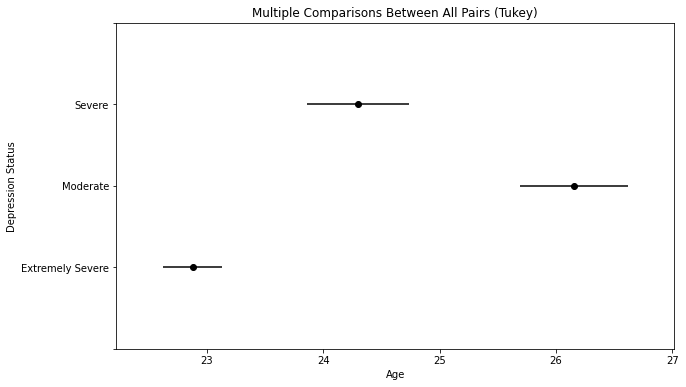

In [52]:
#post hoc
comp = mc.MultiComparison(df['age'], df['depression_status'])
post_hoc_res = comp.tukeyhsd()
print(post_hoc_res.summary())
print("There is a statistically significant difference in age between depression status of all groups. ")
print(post_hoc_res.plot_simultaneous(ylabel= "Depression Status", xlabel= "Age"))
print("The age group around the age of 24 to 25 is the most severe for depression status.")

In [53]:
#Depression and screensize
info = pd.crosstab(index=df['depression_status'], columns=df['screensize'])

# perform chi square
#print(info.values.tolist())
chi2, p, dof, _ = chi2_contingency(info.values.tolist())
print('chi2 value: ', chi2)
print('p value: ', p)
print('dof value: ', dof)


if p < 0.05:
  print(
      'Depression and screensize are NOT independent of each other. There are relationships between these categorical variables.'
  )
else:
    print(
      'Depression and screensize are independent of each other.'
  )

chi2 value:  44.03308244032163
p value:  2.743706407477002e-10
dof value:  2
Depression and screensize are NOT independent of each other. There are relationships between these categorical variables.


In [54]:
#Depression and uniquenetworklocation
info = pd.crosstab(index=df['depression_status'], columns=df['uniquenetworklocation'])

# perform chi square
#print(info.values.tolist())
chi2, p, dof, _ = chi2_contingency(info.values.tolist())
print('chi2 value: ', chi2)
print('p value: ', p)
print('dof value: ', dof)


if p < 0.05:
  print(
      'Depression and uniquenetworklocation are NOT independent of each other. There are relationships between these categorical variables.'
  )
else:
    print(
      'Depression and uniquenetworklocation are independent of each other'
  )

chi2 value:  44.37096715849386
p value:  2.3172180521084596e-10
dof value:  2
Depression and uniquenetworklocation are NOT independent of each other. There are relationships between these categorical variables.


In [55]:
#Depression and hand
info = pd.crosstab(index=df['depression_status'], columns=df['hand'])

# perform chi square
#print(info.values.tolist())
chi2, p, dof, _ = chi2_contingency(info.values.tolist())
print('chi2 value: ', chi2)
print('p value: ', p)
print('dof value: ', dof)


if p < 0.05:
  print(
      'Depression and hand are NOT independent of each other. There are relationships between these categorical variables.'
  )
else:
    print(
      'Depression and hand are independent of each other.'
  )

chi2 value:  24.742691662584903
p value:  0.00038100904681232666
dof value:  6
Depression and hand are NOT independent of each other. There are relationships between these categorical variables.


In [56]:
#Depression and religion
info = pd.crosstab(index=df['depression_status'], columns=df['religion'])

# perform chi square
#print(info.values.tolist())
chi2, p, dof, _ = chi2_contingency(info.values.tolist())
print('chi2 value: ', chi2)
print('p value: ', p)
print('dof value: ', dof)


if p < 0.05:
  print(
      'Depression and religion are NOT independent of each other. There are relationships between these categorical variables.'
  )
else:
    print(
      'Depression and religion are independent of each other.'
  )

chi2 value:  277.1924305897115
p value:  6.341076021622195e-45
dof value:  24
Depression and religion are NOT independent of each other. There are relationships between these categorical variables.


In [57]:
#Depression and orientation
info = pd.crosstab(index=df['depression_status'], columns=df['orientation'])

# perform chi square
#print(info.values.tolist())
chi2, p, dof, _ = chi2_contingency(info.values.tolist())
print('chi2 value: ', chi2)
print('p value: ', p)
print('dof value: ', dof)


if p < 0.05:
  print(
      'Depression and orientation are NOT independent of each other. There are relationships between these categorical variables.'
  )
else:
    print(
      'Depression and orientation are independent of each other.'
  )

chi2 value:  417.64672293292233
p value:  1.6460010334473368e-83
dof value:  10
Depression and orientation are NOT independent of each other. There are relationships between these categorical variables.


In [58]:
#Depression and race
info = pd.crosstab(index=df['depression_status'], columns=df['race'])

# perform chi square
#print(info.values.tolist())
chi2, p, dof, _ = chi2_contingency(info.values.tolist())
print('chi2 value: ', chi2)
print('p value: ', p)
print('dof value: ', dof)


if p < 0.05:
  print(
      'Depression and race are NOT independent of each other. There are relationships between these categorical variables.'
  )
else:
    print(
      'Depression and race are independent of each other.'
  )

chi2 value:  98.28834900721705
p value:  1.2041286978242113e-15
dof value:  12
Depression and race are NOT independent of each other. There are relationships between these categorical variables.


In [59]:
#Depression and voted
info = pd.crosstab(index=df['depression_status'], columns=df['voted'])

# perform chi square
#print(info.values.tolist())
chi2, p, dof, _ = chi2_contingency(info.values.tolist())
print('chi2 value: ', chi2)
print('p value: ', p)
print('dof value: ', dof)


if p < 0.05:
  print(
      'Depression and voted are NOT independent of each other. There are relationships between these categorical variables.'
  )
else:
    print(
      'Depression and voted are independent of each other.'
  )

chi2 value:  333.36608993933606
p value:  6.83852587656601e-71
dof value:  4
Depression and voted are NOT independent of each other. There are relationships between these categorical variables.


In [60]:
#Depression and married
info = pd.crosstab(index=df['depression_status'], columns=df['married'])

# perform chi square
#print(info.values.tolist())
chi2, p, dof, _ = chi2_contingency(info.values.tolist())
print('chi2 value: ', chi2)
print('p value: ', p)
print('dof value: ', dof)


if p < 0.05:
  print(
      'Depression and married are NOT independent of each other. There are relationships between these categorical variables.'
  )
else:
    print(
      'Depression and married are independent of each other.'
  )

chi2 value:  720.5713503737193
p value:  2.211027650468862e-152
dof value:  6
Depression and married are NOT independent of each other. There are relationships between these categorical variables.


In [61]:
#Depression and family size
F,p =stats.f_oneway(df['familysize'][df['depression_status'] == 'Extremely Severe'],
               df['familysize'][df['depression_status'] == 'Severe'],
               df['familysize'][df['depression_status'] == 'Moderate'])
print('F :', F)
print('p value:', p)
if p < 0.05:
  print(
      'Depression and family size has significant difference between the groups.'
  )
else:
    print(
      'Depression and family size has NO significant difference between the groups.'
  )

F : 28.448987754225577
p value: 4.5039224954453383e-13
Depression and family size has significant difference between the groups.


     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
     group1       group2  meandiff p-adj  lower  upper  reject
--------------------------------------------------------------
Extremely Severe Moderate   0.1685 0.001  0.0973 0.2397   True
Extremely Severe   Severe   0.1785 0.001  0.1096 0.2475   True
        Moderate   Severe     0.01   0.9 -0.0793 0.0993  False
--------------------------------------------------------------
There is a statistically significant difference in family size between those who depression status are severe and extremely severe, and depression status are moderate and extremely severe, no other groups differed significantly. 
Figure(720x432)


/home/prasanta/anaconda3/lib/python3.9/site-packages/statsmodels/sandbox/stats/multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


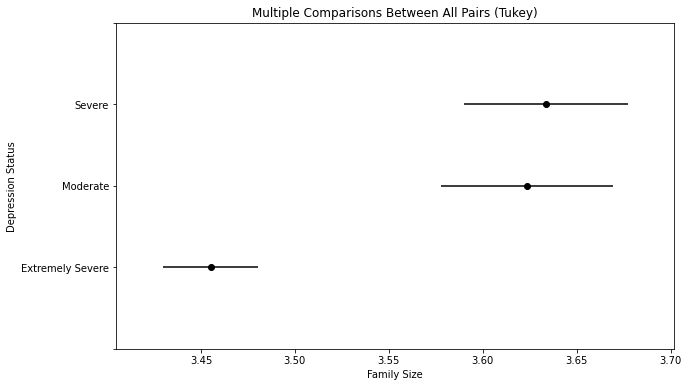

In [62]:
#post hoc
comp = mc.MultiComparison(df['familysize'], df['depression_status'])
post_hoc_res = comp.tukeyhsd()
print(post_hoc_res.summary())
print("There is a statistically significant difference in family size between those who depression status are severe and extremely severe, and depression status are moderate and extremely severe, no other groups differed significantly. ")
print(post_hoc_res.plot_simultaneous(ylabel= "Depression Status", xlabel= "Family Size"))

In [63]:
#Depression and major
info = pd.crosstab(index=df['depression_status'], columns=df['major'])

# perform chi square
#print(info.values.tolist())
chi2, p, dof, _ = chi2_contingency(info.values.tolist())
print('chi2 value: ', chi2)
print('p value: ', p)
print('dof value: ', dof)


if p < 0.05:
  print(
      'Depression and major are NOT independent of each other. There are relationships between these categorical variables.'
  )
else:
    print(
      'Depression and major are independent of each other'
  )

chi2 value:  11941.191323365563
p value:  1.104605642970993e-18
dof value:  10616
Depression and major are NOT independent of each other. There are relationships between these categorical variables.


Anxiety


In [64]:
#Anxiety and education
info = pd.crosstab(index=df['anxiety_status'], columns=df['education'])

# perform chi square
#print(info.values.tolist())
chi2, p, dof, _ = chi2_contingency(info.values.tolist())
print('chi2 value: ', chi2)
print('p value: ', p)
print('dof value: ', dof)


if p < 0.05:
  print(
      'Anxiety and Education are NOT independent of each other. There are relationships between these categorical variables.'
  )
else:
    print(
      'Anxiety and Education are independent of each other.'
  )

chi2 value:  640.3353025252006
p value:  4.9546452712756546e-133
dof value:  8
Anxiety and Education are NOT independent of each other. There are relationships between these categorical variables.


In [65]:
#Anxiety and urban
info = pd.crosstab(index=df['anxiety_status'], columns=df['urban'])

# perform chi square
#print(info.values.tolist())
chi2, p, dof, _ = chi2_contingency(info.values.tolist())
print('chi2 value: ', chi2)
print('p value: ', p)
print('dof value: ', dof)


if p < 0.05:
  print(
      'Anxiety and Urban are NOT independent of each other. There are relationships between these categorical variables.'
  )
else:
    print(
      'Anxiety and Urban are independent of each other.'
  )

chi2 value:  33.58539065517674
p value:  8.088132201879936e-06
dof value:  6
Anxiety and Urban are NOT independent of each other. There are relationships between these categorical variables.


In [66]:
#Anxiety and gender
info = pd.crosstab(index=df['anxiety_status'], columns=df['gender'])

# perform chi square
#print(info.values.tolist())
chi2, p, dof, _ = chi2_contingency(info.values.tolist())
print('chi2 value: ', chi2)
print('p value: ', p)
print('dof value: ', dof)


if p < 0.05:
  print(
      'Anxiety and gender are NOT independent of each other. There are relationships between these categorical variables.'
  )
else:
    print(
      'Anxiety and gender are independent of each other.'
  )

chi2 value:  575.1493386071479
p value:  5.33825873123868e-121
dof value:  6
Anxiety and gender are NOT independent of each other. There are relationships between these categorical variables.


In [67]:
#Anxiety and engnat
info = pd.crosstab(index=df['anxiety_status'], columns=df['engnat'])

# perform chi square
#print(info.values.tolist())
chi2, p, dof, _ = chi2_contingency(info.values.tolist())
print('chi2 value: ', chi2)
print('p value: ', p)
print('dof value: ', dof)


if p < 0.05:
  print(
      'Anxiety and engnat are NOT independent of each other. There are relationships between these categorical variables.'
  )
else:
    print(
      'Anxiety and engnat are independent of each other.'
  )

chi2 value:  91.2529424838539
p value:  7.13358531460184e-19
dof value:  4
Anxiety and engnat are NOT independent of each other. There are relationships between these categorical variables.


In [68]:
#Anxiety and age
F,p = stats.f_oneway(df['age'][df['anxiety_status'] == 'Extremely Severe'],
               df['age'][df['anxiety_status'] == 'Severe'],
               df['age'][df['anxiety_status'] == 'Moderate'])
print('F :', F)
print('p value:', p)
if p < 0.05:
  print(
      'Anxiety and age has significant difference between the groups.'
  )
else:
    print(
      'Anxiety and age has NO significant difference between the groups.'
  )

F : 182.62778138442653
p value: 1.1162160404643314e-79
Anxiety and age has significant difference between the groups.


      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
     group1       group2  meandiff p-adj  lower   upper  reject
---------------------------------------------------------------
Extremely Severe Moderate   8.1602 0.001  6.4717  9.8488   True
Extremely Severe   Severe   4.8615 0.001  4.1534  5.5696   True
        Moderate   Severe  -3.2988 0.001 -5.0872 -1.5104   True
---------------------------------------------------------------
There is a statistically significant difference in age between anxiety status of all groups. 
Figure(720x432)
The age group around the age of 22 to 23 is the most severe for anxiety status.


/home/prasanta/anaconda3/lib/python3.9/site-packages/statsmodels/sandbox/stats/multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


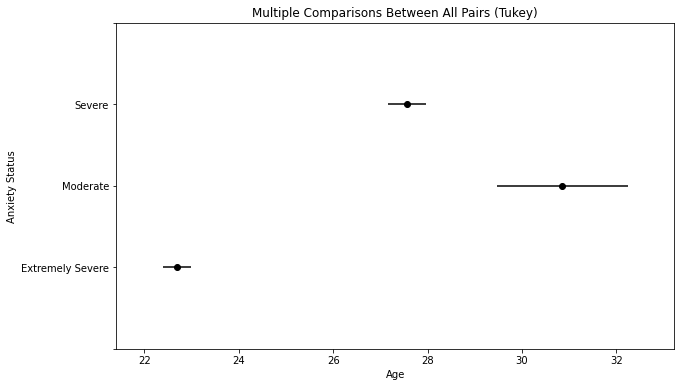

In [69]:
#post hoc
comp = mc.MultiComparison(df['age'], df['anxiety_status'])
post_hoc_res = comp.tukeyhsd()
print(post_hoc_res.summary())
print("There is a statistically significant difference in age between anxiety status of all groups. ")
print(post_hoc_res.plot_simultaneous(ylabel= "Anxiety Status", xlabel= "Age"))
print("The age group around the age of 22 to 23 is the most severe for anxiety status.")

In [70]:
#Anxiety and screensize
info = pd.crosstab(index=df['anxiety_status'], columns=df['screensize'])

# perform chi square
#print(info.values.tolist())
chi2, p, dof, _ = chi2_contingency(info.values.tolist())
print('chi2 value: ', chi2)
print('p value: ', p)
print('dof value: ', dof)


if p < 0.05:
  print(
      'Anxiety and screen size are NOT independent of each other.There are relationships between these categorical variables.'
  )
else:
    print(
      'Anxiety and screen size are independent of each other.'
  )

chi2 value:  427.75489513579384
p value:  1.3007825963723119e-93
dof value:  2
Anxiety and screen size are NOT independent of each other.There are relationships between these categorical variables.


In [71]:
#Anxiety and uniquenetworklocation
info = pd.crosstab(index=df['anxiety_status'], columns=df['uniquenetworklocation'])

# perform chi square
#print(info.values.tolist())
chi2, p, dof, _ = chi2_contingency(info.values.tolist())
print('chi2 value: ', chi2)
print('p value: ', p)
print('dof value: ', dof)


if p < 0.05:
  print(
      'Anxiety and unique network location are NOT independent of each other. There are relationships between these categorical variables.'
  )
else:
    print(
      'Anxiety and unique network location are independent of each other.'
  )

chi2 value:  35.00134596507881
p value:  2.509309865650826e-08
dof value:  2
Anxiety and unique network location are NOT independent of each other. There are relationships between these categorical variables.


In [72]:
###Anxiety and hand######
###Effected#####
info = pd.crosstab(index=df['anxiety_status'], columns=df['hand'])

# perform chi square
#print(info.values.tolist())
chi2, p, dof, _ = chi2_contingency(info.values.tolist())
print('chi2 value: ', chi2)
print('p value: ', p)
print('dof value: ', dof)


if p < 0.05:
  print(
      'Anxiety and hand are NOT independent of each other. There are relationships between these categorical variables.'
  )
else:
    print(
      'Anxiety and hand are independent of each other.'
  )


chi2 value:  10.965077690965012
p value:  0.0894617636369601
dof value:  6
Anxiety and hand are independent of each other.


In [73]:
#Anxiety and religion
info = pd.crosstab(index=df['anxiety_status'], columns=df['religion'])

# perform chi square
#print(info.values.tolist())
chi2, p, dof, _ = chi2_contingency(info.values.tolist())
print('chi2 value: ', chi2)
print('p value: ', p)
print('dof value: ', dof)


if p < 0.05:
  print(
      'Anxiety and religion are NOT independent of each other. There are relationships between these categorical variables.'
  )
else:
    print(
      'Anxiety and religion are independent of each other.'
  )

chi2 value:  362.37280626757723
p value:  3.775797571268239e-62
dof value:  24
Anxiety and religion are NOT independent of each other. There are relationships between these categorical variables.


In [74]:
#Anxiety and orientation
info = pd.crosstab(index=df['anxiety_status'], columns=df['orientation'])

# perform chi square
#print(info.values.tolist())
chi2, p, dof, _ = chi2_contingency(info.values.tolist())
print('chi2 value: ', chi2)
print('p value: ', p)
print('dof value: ', dof)


if p < 0.05:
  print(
      'Anxiety and orientation are NOT independent of each other. There are relationships between these categorical variables.'
  )
else:
    print(
      'Anxiety and orientation are independent of each other.'
  )

chi2 value:  439.4308581701877
p value:  3.7495133383015107e-88
dof value:  10
Anxiety and orientation are NOT independent of each other. There are relationships between these categorical variables.


In [75]:
#Anxiety and race
info = pd.crosstab(index=df['anxiety_status'], columns=df['race'])

# perform chi square
#print(info.values.tolist())
chi2, p, dof, _ = chi2_contingency(info.values.tolist())
print('chi2 value: ', chi2)
print('p value: ', p)
print('dof value: ', dof)


if p < 0.05:
  print(
      'Anxiety and race are NOT independent of each other. There are relationships between these categorical variables. '
  )
else:
    print(
      'Anxiety and race are independent of each other.'
  )

chi2 value:  270.1457637277109
p value:  8.482178588706789e-51
dof value:  12
Anxiety and race are NOT independent of each other. There are relationships between these categorical variables. 


In [76]:
#Anxiety and voted
info = pd.crosstab(index=df['anxiety_status'], columns=df['voted'])

# perform chi square
#print(info.values.tolist())
chi2, p, dof, _ = chi2_contingency(info.values.tolist())
print('chi2 value: ', chi2)
print('p value: ', p)
print('dof value: ', dof)


if p < 0.05:
  print(
      'Anxiety and voted are NOT independent of each other. There are relationships between these categorical variables.'
  )
else:
    print(
      'Anxiety and voted are independent of each other'
  )

chi2 value:  606.6372765788765
p value:  5.671757897571128e-130
dof value:  4
Anxiety and voted are NOT independent of each other. There are relationships between these categorical variables.


In [77]:
#Anxiety and married
info = pd.crosstab(index=df['anxiety_status'], columns=df['married'])

# perform chi square
#print(info.values.tolist())
chi2, p, dof, _ = chi2_contingency(info.values.tolist())
print('chi2 value: ', chi2)
print('p value: ', p)
print('dof value: ', dof)


if p < 0.05:
  print(
      'Anxiety and married are NOT independent of each other. There are relationships between these categorical variables.'
  )
else:
    print(
      'Anxiety and married are independent of each other.'
  )

chi2 value:  1173.6081396823433
p value:  2.4641489064221383e-250
dof value:  6
Anxiety and married are NOT independent of each other. There are relationships between these categorical variables.


In [78]:
#Anxiety and family size
F,p = stats.f_oneway(df['familysize'][df['anxiety_status'] == 'Extremely Severe'],
               df['familysize'][df['anxiety_status'] == 'Severe'],
               df['familysize'][df['anxiety_status'] == 'Moderate'])
print('F :', F)
print('p value:', p)
if p < 0.05:
  print(
      'Anxiety and family size has significant difference between the groups.'
  )
else:
    print(
      'Anxiety and family size has NO significant difference between the groups.'
  )

F : 3.694540129983714
p value: 0.02486741478769202
Anxiety and family size has significant difference between the groups.


      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
     group1       group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------------
Extremely Severe Moderate  -0.1941 0.0189 -0.3624 -0.0258   True
Extremely Severe   Severe   -0.014 0.8778 -0.0846  0.0566  False
        Moderate   Severe   0.1801  0.047  0.0018  0.3583   True
----------------------------------------------------------------
There is a statistically significant difference in family size between those who anxiety status are moderate and extremely severe, and anxiety status are moderate and severe, no other groups differed significantly. 
Figure(720x432)


/home/prasanta/anaconda3/lib/python3.9/site-packages/statsmodels/sandbox/stats/multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


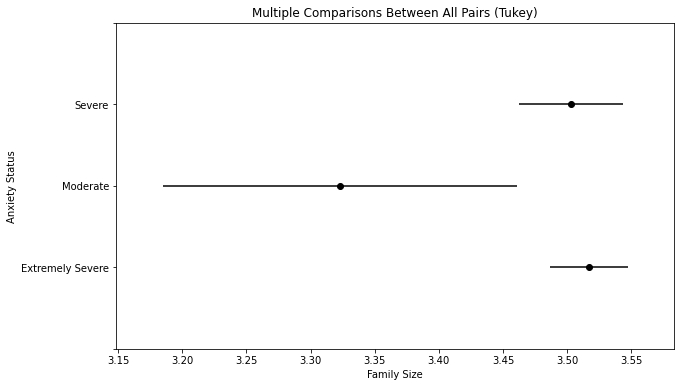

In [79]:
#post hoc
comp = mc.MultiComparison(df['familysize'], df['anxiety_status'])
post_hoc_res = comp.tukeyhsd()
print(post_hoc_res.summary())
print("There is a statistically significant difference in family size between those who anxiety status are moderate and extremely severe, and anxiety status are moderate and severe, no other groups differed significantly. ")
print(post_hoc_res.plot_simultaneous(ylabel= "Anxiety Status", xlabel= "Family Size"))


In [80]:
#Anxiety and major
info = pd.crosstab(index=df['anxiety_status'], columns=df['major'])

# perform chi square
#print(info.values.tolist())
chi2, p, dof, _ = chi2_contingency(info.values.tolist())
print('chi2 value: ', chi2)
print('p value: ', p)
print('dof value: ', dof)


if p < 0.05:
  print(
      'Anxiety and major are NOT independent of each other. There are relationships between these categorical variables.'
  )
else:
    print(
      'Anxiety and major are independent of each other.'
  )

chi2 value:  11288.933113877549
p value:  2.9678577932970194e-06
dof value:  10616
Anxiety and major are NOT independent of each other. There are relationships between these categorical variables.


Stress

In [81]:
#Stress and education
info = pd.crosstab(index=df['stress_status'], columns=df['education'])

# perform chi square
#print(info.values.tolist())
chi2, p, dof, _ = chi2_contingency(info.values.tolist())
print('chi2 value: ', chi2)
print('p value: ', p)
print('dof value: ', dof)


if p < 0.05:
  print(
      'Stress and Education are NOT independent of each other. There are relationships between these categorical variables.'
  )
else:
    print(
      'Stress and Education are independent of each other.'
  )

chi2 value:  787.4402183418634
p value:  3.028185212777724e-157
dof value:  16
Stress and Education are NOT independent of each other. There are relationships between these categorical variables.


In [82]:
#Stress and urban
info = pd.crosstab(index=df['stress_status'], columns=df['urban'])

# perform chi square
#print(info.values.tolist())
chi2, p, dof, _ = chi2_contingency(info.values.tolist())
print('chi2 value: ', chi2)
print('p value: ', p)
print('dof value: ', dof)


if p < 0.05:
  print(
      'Stress and Urban are NOT independent of each other. There are relationships between these categorical variables.'
  )
else:
    print(
      'Stress and Urban are NOT independent of each other.'
  )

chi2 value:  56.85881534323863
p value:  8.381862450216685e-08
dof value:  12
Stress and Urban are NOT independent of each other. There are relationships between these categorical variables.


In [83]:
#Stress and gender
info = pd.crosstab(index=df['stress_status'], columns=df['gender'])

# perform chi square
#print(info.values.tolist())
chi2, p, dof, _ = chi2_contingency(info.values.tolist())
print('chi2 value: ', chi2)
print('p value: ', p)
print('dof value: ', dof)


if p < 0.05:
  print(
      'Stress and gender are NOT independent of each other. There are relationships between these categorical variables.'
  )
else:
    print(
      'Stress and gender are independent of each other.'
  )

chi2 value:  680.5018351714807
p value:  6.56340850137621e-138
dof value:  12
Stress and gender are NOT independent of each other. There are relationships between these categorical variables.


In [84]:
#Stress and engnat
info = pd.crosstab(index=df['stress_status'], columns=df['engnat'])

# perform chi square
#print(info.values.tolist())
chi2, p, dof, _ = chi2_contingency(info.values.tolist())
print('chi2 value: ', chi2)
print('p value: ', p)
print('dof value: ', dof)


if p < 0.05:
  print(
      'Stress and engnat are NOT independent of each other. There are relationships between these categorical variables.'
  )
else:
    print(
      'Stress and engnat are independent of each other.'
  )

chi2 value:  81.19393797905116
p value:  2.81033807500719e-14
dof value:  8
Stress and engnat are NOT independent of each other. There are relationships between these categorical variables.


In [85]:
#Stress and age
F,p = stats.f_oneway(df['age'][df['stress_status'] == 'Extremely Severe'],
               df['age'][df['stress_status'] == 'Severe'],
               df['age'][df['stress_status'] == 'Moderate'],
              df['age'][df['stress_status'] == 'Normal'],
              df['age'][df['stress_status'] == 'Mild'])

print('F :', F)
print('p value:', p)
if p < 0.05:
  print(
      'Stress and age has significant difference between the groups.'
  )
else:
    print(
      'Stress and age has NO significant difference between the groups.'
  )

F : 46.15321374223654
p value: 9.38658662789982e-39
Stress and age has significant difference between the groups.


      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
     group1       group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------------
Extremely Severe     Mild    4.269  0.001  2.8732  5.6648   True
Extremely Severe Moderate   3.2108  0.001  2.3616    4.06   True
Extremely Severe   Normal   7.1702  0.001  3.8158 10.5246   True
Extremely Severe   Severe   1.4303  0.001  0.7098  2.1508   True
            Mild Moderate  -1.0582 0.3272 -2.5924   0.476  False
            Mild   Normal   2.9012 0.1777 -0.6883  6.4907  False
            Mild   Severe  -2.8387  0.001 -4.3056 -1.3718   True
        Moderate   Normal   3.9594 0.0135  0.5451  7.3737   True
        Moderate   Severe  -1.7805  0.001 -2.7421 -0.8189   True
          Normal   Severe  -5.7399  0.001 -9.1245 -2.3553   True
----------------------------------------------------------------
There is a statistically significant difference in age between stress status of all groups

/home/prasanta/anaconda3/lib/python3.9/site-packages/statsmodels/sandbox/stats/multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


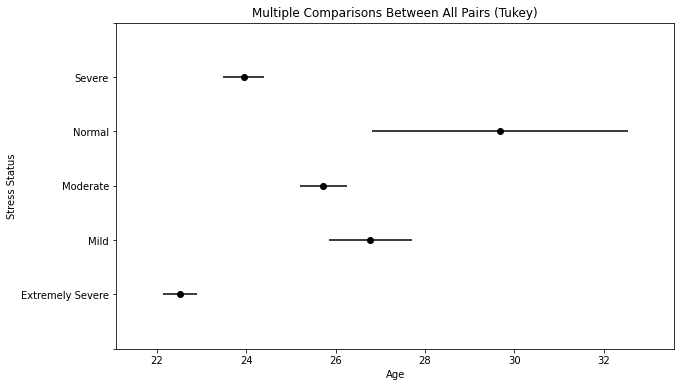

In [86]:
#post hoc
comp = mc.MultiComparison(df['age'], df['stress_status'])
post_hoc_res = comp.tukeyhsd()
print(post_hoc_res.summary())
print("There is a statistically significant difference in age between stress status of all groups except stress level of mild and moderate, and stress level of mild and severe. ")
print(post_hoc_res.plot_simultaneous(ylabel= "Stress Status", xlabel= "Age"))
print("The age group around the age of 22 to 23 is the most severe for stress status.")

In [87]:
#Stress and screensize
info = pd.crosstab(index=df['stress_status'], columns=df['screensize'])

# perform chi square
#print(info.values.tolist())
chi2, p, dof, _ = chi2_contingency(info.values.tolist())
print('chi2 value: ', chi2)
print('p value: ', p)
print('dof value: ', dof)


if p < 0.05:
  print(
      'Stress and screensize are NOT independent of each other. There are relationships between these categorical variables.'
  )
else:
    print(
      'Stress and screensize are independent of each other.'
  )

chi2 value:  107.9114595483348
p value:  2.0292580215627902e-22
dof value:  4
Stress and screensize are NOT independent of each other. There are relationships between these categorical variables.


In [88]:
#Stress and uniquenetworklocation
info = pd.crosstab(index=df['stress_status'], columns=df['uniquenetworklocation'])

# perform chi square
#print(info.values.tolist())
chi2, p, dof, _ = chi2_contingency(info.values.tolist())
print('chi2 value: ', chi2)
print('p value: ', p)
print('dof value: ', dof)


if p < 0.05:
  print(
      'Stress and uniquenetworklocation are NOT independent of each other. There are relationships between these categorical variables.'
  )
else:
    print(
      'Stress and uniquenetworklocation are independent of each other.'
  )

chi2 value:  9.633402929575663
p value:  0.04707712228762675
dof value:  4
Stress and uniquenetworklocation are NOT independent of each other. There are relationships between these categorical variables.


In [89]:
#Stress and hand
info = pd.crosstab(index=df['stress_status'], columns=df['hand'])

# perform chi square
#print(info.values.tolist())
chi2, p, dof, _ = chi2_contingency(info.values.tolist())
print('chi2 value: ', chi2)
print('p value: ', p)
print('dof value: ', dof)


if p < 0.05:
  print(
      'Stress and hand are NOT independent of each other. There are relationships between these categorical variables.'
  )
else:
    print(
      'Stress and hand are independent of each other.'
  )

chi2 value:  61.4094285918622
p value:  1.2477818713848391e-08
dof value:  12
Stress and hand are NOT independent of each other. There are relationships between these categorical variables.


In [90]:
#Stress and religion
info = pd.crosstab(index=df['stress_status'], columns=df['religion'])

# perform chi square
#print(info.values.tolist())
chi2, p, dof, _ = chi2_contingency(info.values.tolist())
print('chi2 value: ', chi2)
print('p value: ', p)
print('dof value: ', dof)


if p < 0.05:
  print(
      'Stress and religion are NOT independent of each other. There are relationships between these categorical variables.'
  )
else:
    print(
      'Stress and religion are independent of each other.'
  )

chi2 value:  237.99089094451713
p value:  5.4684206397830144e-27
dof value:  48
Stress and religion are NOT independent of each other. There are relationships between these categorical variables.


In [91]:
#Stress and orientation
info = pd.crosstab(index=df['stress_status'], columns=df['orientation'])

# perform chi square
#print(info.values.tolist())
chi2, p, dof, _ = chi2_contingency(info.values.tolist())
print('chi2 value: ', chi2)
print('p value: ', p)
print('dof value: ', dof)


if p < 0.05:
  print(
      'Stress and orientation are NOT independent of each other. There are relationships between these categorical variables.'
  )
else:
    print(
      'Stress and orientation are independent of each other.'
  )

chi2 value:  496.1263223417723
p value:  1.882856348040941e-92
dof value:  20
Stress and orientation are NOT independent of each other. There are relationships between these categorical variables.


In [92]:
#Stress and race
info = pd.crosstab(index=df['stress_status'], columns=df['race'])

# perform chi square
#print(info.values.tolist())
chi2, p, dof, _ = chi2_contingency(info.values.tolist())
print('chi2 value: ', chi2)
print('p value: ', p)
print('dof value: ', dof)


if p < 0.05:
  print(
      'Stress and race are NOT independent of each other. There are relationships between these categorical variables.'
  )
else:
    print(
      'Stress and race are independent of each other'
  )

chi2 value:  107.09627524755741
p value:  1.806117719197219e-12
dof value:  24
Stress and race are NOT independent of each other. There are relationships between these categorical variables.


In [93]:
#Stress and voted
info = pd.crosstab(index=df['stress_status'], columns=df['voted'])

# perform chi square
#print(info.values.tolist())
chi2, p, dof, _ = chi2_contingency(info.values.tolist())
print('chi2 value: ', chi2)
print('p value: ', p)
print('dof value: ', dof)


if p < 0.05:
  print(
      'Stress and voted are NOT independent of each other. There are relationships between these categorical variables.'
  )
else:
    print(
      'Stress and voted are independent of each other.'
  )

chi2 value:  429.68321658212693
p value:  8.312991616276009e-88
dof value:  8
Stress and voted are NOT independent of each other. There are relationships between these categorical variables.


In [94]:
#Stress and married
info = pd.crosstab(index=df['stress_status'], columns=df['married'])

# perform chi square
#print(info.values.tolist())
chi2, p, dof, _ = chi2_contingency(info.values.tolist())
print('chi2 value: ', chi2)
print('p value: ', p)
print('dof value: ', dof)


if p < 0.05:
  print(
      'Stress and married are NOT independent of each other. There are relationships between these categorical variables.'
  )
else:
    print(
      'Stress and married are independent of each other.'
  )

chi2 value:  546.4813015321422
p value:  2.7837434950638835e-109
dof value:  12
Stress and married are NOT independent of each other. There are relationships between these categorical variables.


In [95]:
#Stress and family size
F,p = stats.f_oneway(df['familysize'][df['stress_status'] == 'Extremely Severe'],
               df['familysize'][df['stress_status'] == 'Severe'],
               df['familysize'][df['stress_status'] == 'Moderate'],
              df['familysize'][df['stress_status'] == 'Normal'],
              df['familysize'][df['stress_status'] == 'Mild'])

print('F :', F)
print('p value:', p)
if p < 0.05:
  print(
      'Stress and family size has significant difference between the groups.'
  )
else:
    print(
      'Stress and family size has NO significant difference between the groups.'
  )

F : 9.974520983256014
p value: 4.584939087825784e-08
Stress and family size has significant difference between the groups.


      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
     group1       group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------------
Extremely Severe     Mild    0.192 0.0015  0.0533  0.3308   True
Extremely Severe Moderate    0.165  0.001  0.0806  0.2494   True
Extremely Severe   Normal    0.179 0.5744 -0.1545  0.5124  False
Extremely Severe   Severe   0.0687 0.0677  -0.003  0.1403  False
            Mild Moderate   -0.027    0.9 -0.1795  0.1255  False
            Mild   Normal  -0.0131    0.9 -0.3699  0.3438  False
            Mild   Severe  -0.1234 0.1421 -0.2692  0.0224  False
        Moderate   Normal    0.014    0.9 -0.3254  0.3534  False
        Moderate   Severe  -0.0964 0.0471 -0.1919 -0.0008   True
          Normal   Severe  -0.1103 0.8977 -0.4468  0.2261  False
----------------------------------------------------------------
There is a statistically significant difference in family size between those who stress st

/home/prasanta/anaconda3/lib/python3.9/site-packages/statsmodels/sandbox/stats/multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


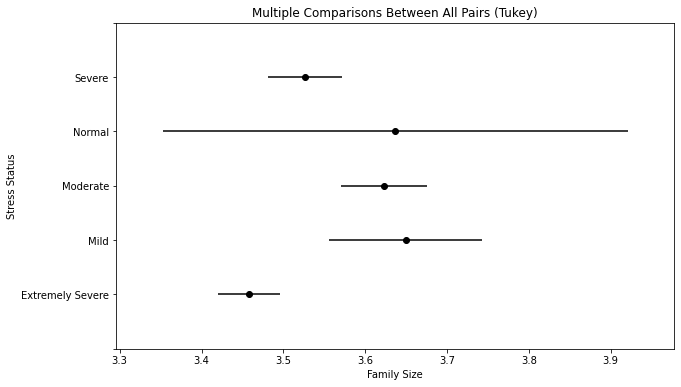

In [96]:
#post hoc
comp = mc.MultiComparison(df['familysize'], df['stress_status'])
post_hoc_res = comp.tukeyhsd()
print(post_hoc_res.summary())
print("There is a statistically significant difference in family size between those who stress status are mild and extremely severe, stress status that are moderate and extremely severe, and stress status that are moderate and severe, no other groups differed significantly. ")
print(post_hoc_res.plot_simultaneous(ylabel= "Stress Status", xlabel= "Family Size"))


In [97]:
#Stress and major
info = pd.crosstab(index=df['stress_status'], columns=df['major'])

# perform chi square
#print(info.values.tolist())
chi2, p, dof, _ = chi2_contingency(info.values.tolist())
print('chi2 value: ', chi2)
print('p value: ', p)
print('dof value: ', dof)


if p < 0.05:
  print(
      'Stress and major are NOT independent of each other. There are relationships between these categorical variables.'
  )
else:
    print(
      'Stress and major are independent of each other.'
  )

chi2 value:  22141.965811294365
p value:  6.577121764052317e-06
dof value:  21232
Stress and major are NOT independent of each other. There are relationships between these categorical variables.


All the catergorical variables have relationship between each of the depression, stress and anxiety status except for hand and anxiety status. Wheareas for the numerical variables, both the age and family size have different means across different status of depression, stress and anxiety. 

<a class="anchor" id="question_2"></a>

# Question 3

### What is the correlation between depression, anxiety and stress based on the dataset?

### Correlation using Spearman's Rank Correlation

In [98]:
data = pd.read_csv("modified_dataset.csv")

In [99]:
#Reduced dataset to DAS scores and status
df = data[['depression_scores','anxiety_scores','stress_scores','depression_status','anxiety_status','stress_status']]

In [100]:
#correlation matrix with Spearman's rank correlation coefficient between two ordinal data using pandas
matrix = df.corr(
    method = 'spearman',
    min_periods = 1
)

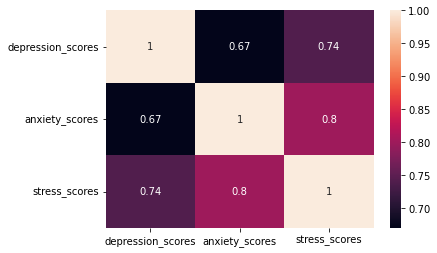

Observations:
- There are strong correlations between all variables - Depression, Anxiety, and Stress
- Stress and Anxiety displaying strongest positive correlation


In [101]:
#Summary for Linear Regression

#Generating Heatmap between depression, anxiety and stress scores
matrix = df.corr().round(2)
sns.heatmap(matrix,annot=True)
plt.show()


print ('Observations:')
print ('- There are strong correlations between all variables - Depression, Anxiety, and Stress')
print ('- Stress and Anxiety displaying strongest positive correlation')


In [102]:
#Data with all 42 questions and Depression score


df_depression = data[['depression_scores','Q1A','Q2A','Q3A','Q4A','Q5A','Q6A','Q7A','Q8A','Q9A','Q10A','Q11A','Q12A','Q13A','Q14A','Q15A','Q16A','Q17A','Q18A','Q19A','Q20A','Q21A','Q22A','Q23A','Q24A','Q25A','Q26A','Q27A','Q28A','Q29A','Q30A','Q31A','Q32A','Q33A','Q34A','Q35A','Q36A','Q37A','Q38A','Q39A','Q40A','Q41A']]


In [103]:
#Correlation Matrix for Depression_scores against 42 Questions
depression_matrix = df_depression.corr(
    method = 'spearman',
    min_periods = 1
)

#.style.background_gradient() adds gradient style for easier correlation understanding
depression_matrix.style.background_gradient()   

,depression_scores,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,Q11A,Q12A,Q13A,Q14A,Q15A,Q16A,Q17A,Q18A,Q19A,Q20A,Q21A,Q22A,Q23A,Q24A,Q25A,Q26A,Q27A,Q28A,Q29A,Q30A,Q31A,Q32A,Q33A,Q34A,Q35A,Q36A,Q37A,Q38A,Q39A,Q40A,Q41A
depression_scores,1.000000,0.588393,0.348604,0.795485,0.442266,0.766695,0.488454,0.437265,0.582315,0.494752,0.832233,0.604951,0.515265,0.817989,0.383098,0.455858,0.804310,0.815207,0.452208,0.353595,0.551530,0.847682,0.577275,0.404433,0.781830,0.410297,0.784194,0.580540,0.518973,0.566905,0.527061,0.771088,0.502369,0.538245,0.825260,0.509586,0.581373,0.807509,0.840579,0.567245,0.503279,0.413495
Q1A,0.588393,1.000000,0.310075,0.475631,0.383639,0.464331,0.560454,0.386351,0.477137,0.471540,0.450097,0.674480,0.467362,0.543846,0.437925,0.364540,0.464860,0.495106,0.486322,0.315471,0.489664,0.476676,0.490858,0.332709,0.462497,0.360411,0.508327,0.577269,0.463749,0.581257,0.484355,0.437868,0.488755,0.469924,0.501378,0.481646,0.498813,0.435316,0.465102,0.529499,0.477736,0.358216
Q2A,0.348604,0.310075,1.000000,0.275811,0.365205,0.278047,0.276610,0.372429,0.300279,0.323303,0.265712,0.307862,0.321511,0.297728,0.284228,0.339556,0.290296,0.288434,0.271073,0.331801,0.336977,0.281181,0.301880,0.377925,0.282430,0.351324,0.293071,0.293178,0.327649,0.312744,0.320125,0.279970,0.300398,0.316138,0.290992,0.299118,0.345618,0.260507,0.270199,0.287955,0.322985,0.352690
Q3A,0.795485,0.475631,0.275811,1.000000,0.358457,0.583997,0.400259,0.347689,0.495529,0.385975,0.636444,0.486180,0.418338,0.633331,0.307064,0.367414,0.630535,0.589595,0.355144,0.281280,0.440993,0.631000,0.483685,0.334515,0.646846,0.327589,0.602531,0.464756,0.417024,0.470893,0.403278,0.637377,0.406335,0.440577,0.598682,0.419508,0.462639,0.616581,0.625921,0.457961,0.383345,0.325183
Q4A,0.442266,0.383639,0.365205,0.358457,1.000000,0.357877,0.366995,0.538597,0.430870,0.426266,0.338781,0.384293,0.464982,0.395946,0.314537,0.492683,0.347529,0.363382,0.312922,0.419229,0.463119,0.368766,0.414329,0.471398,0.349521,0.557157,0.375988,0.370649,0.524896,0.416308,0.377243,0.337268,0.353987,0.477666,0.361372,0.351687,0.456456,0.327538,0.356336,0.400120,0.419478,0.511162
Q5A,0.766695,0.464331,0.278047,0.583997,0.357877,1.000000,0.393891,0.361426,0.497126,0.397400,0.593257,0.469370,0.440161,0.605082,0.312423,0.375206,0.596371,0.561103,0.361176,0.289561,0.438219,0.582737,0.504520,0.324473,0.592858,0.336571,0.591815,0.471845,0.430119,0.451419,0.426157,0.589438,0.421990,0.463768,0.569556,0.424202,0.443586,0.559489,0.570531,0.485272,0.394981,0.337404
Q6A,0.488454,0.560454,0.276610,0.400259,0.366995,0.393891,1.000000,0.369720,0.467009,0.446237,0.368390,0.570791,0.462797,0.444179,0.419940,0.337954,0.369880,0.421463,0.446804,0.309320,0.453423,0.398398,0.461871,0.310788,0.377261,0.340414,0.422157,0.533558,0.474557,0.544977,0.421386,0.353742,0.449989,0.457852,0.423269,0.448279,0.450544,0.357973,0.382317,0.491823,0.463443,0.346651
Q7A,0.437265,0.386351,0.372429,0.347689,0.538597,0.361426,0.369720,1.000000,0.426966,0.434924,0.334112,0.379238,0.481091,0.389760,0.323548,0.502754,0.344088,0.361581,0.315471,0.456243,0.470024,0.360752,0.408118,0.457721,0.338465,0.486898,0.374176,0.370898,0.522774,0.415909,0.402277,0.334340,0.355181,0.485202,0.366603,0.354133,0.463705,0.324279,0.347227,0.402513,0.436773,0.649578
Q8A,0.582315,0.477137,0.300279,0.495529,0.430870,0.497126,0.467009,0.426966,1.000000,0.461005,0.446007,0.485820,0.554014,0.523614,0.375906,0.404884,0.457954,0.445657,0.378664,0.338482,0.489843,0.457227,0.607745,0.366746,0.490127,0.409120,0.495545,0.479947,0.536992,0.541452,0.426084,0.462473,0.442490,0.579074,0.450478,0.435271,0.485125,0.425421,0.446301,0.521000,0.441597,0.397954
Q9A,0.494752,0.471540,0.323303,0.385975,0.426266,0.397400,0.446237,0.434924,0.461005,1.000000,0.380969,0.468460,0.544427,0.444327,0.374420,0.365285,0.387234,0.427215,0.364685,0.375047,0.527263,0.389381,0.439225,0.339074,0.386997,0.416542,0.423123,0.434958,0.553507,0.486585,0.506374,0.374470,0.418442,0.547969,0.431065,0.408125,0.528

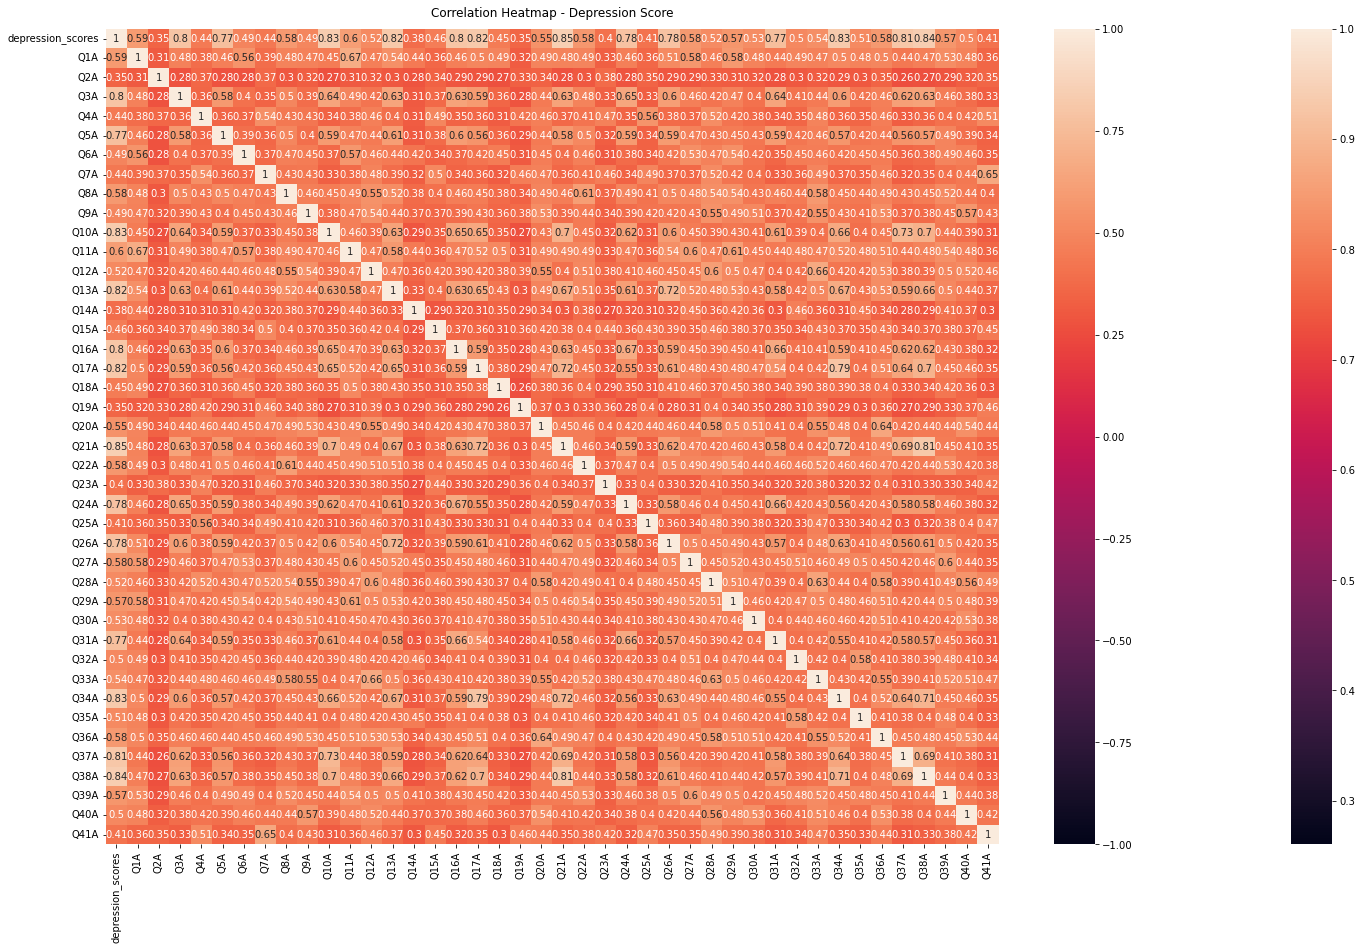

In [104]:
#Heatmap - All Variables against Depression Score

plt.figure(figsize=(25,15))
sns.heatmap(depression_matrix)
depression_heatmap = sns.heatmap(depression_matrix, vmin=-1,vmax=1, annot=True)

#title for heatmap
depression_heatmap.set_title('Correlation Heatmap - Depression Score', fontdict={'fontsize':12}, pad=12); 

In [105]:
#Format dataset to for Anxiety_scores against 42 Questions

df_anxiety = data[['anxiety_scores','Q1A','Q2A','Q3A','Q4A','Q5A','Q6A','Q7A','Q8A','Q9A','Q10A','Q11A','Q12A','Q13A','Q14A','Q15A','Q16A','Q17A','Q18A','Q19A','Q20A','Q21A','Q22A','Q23A','Q24A','Q25A','Q26A','Q27A','Q28A','Q29A','Q30A','Q31A','Q32A','Q33A','Q34A','Q35A','Q36A','Q37A','Q38A','Q39A','Q40A','Q41A']]

,anxiety_scores,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,...,Q32A,Q33A,Q34A,Q35A,Q36A,Q37A,Q38A,Q39A,Q40A,Q41A
0,48,4,4,2,4,4,4,4,4,2,...,4,2,3,4,4,1,2,4,3,4
1,31,4,1,2,3,4,4,3,4,3,...,3,3,2,2,3,4,2,2,1,2
2,26,3,1,4,1,4,3,1,3,2,...,3,1,4,3,4,4,4,2,2,1
3,31,2,3,2,1,3,3,4,2,3,...,1,2,4,1,1,2,1,3,4,4
4,54,2,2,3,4,4,2,4,4,4,...,4,4,4,3,4,3,3,3,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39770,26,2,1,3,2,3,2,1,3,1,...,1,2,4,1,2,4,4,2,3,1
39771,48,3,4,3,4,3,4,4,4,3,...,3,3,4,3,3,3,4,3,3,3
39772,15,2,1,2,1,1,1,1,1,2,...,1,2,1,1,1,1,1,2,1,1
39773,27,3,1,2,2,3,3,3,4,3,...,3,4,2,3,2,1,2,3,2,4


In [106]:
#Correlation Matrix for Anxiety_scores against 42 Questions
anxiety_matrix = df_anxiety.corr(
    method = 'spearman',
    min_periods = 1
)

#.style.background_gradient() adds gradient style for easier correlation understanding
anxiety_matrix.style.background_gradient()   

,anxiety_scores,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,Q11A,Q12A,Q13A,Q14A,Q15A,Q16A,Q17A,Q18A,Q19A,Q20A,Q21A,Q22A,Q23A,Q24A,Q25A,Q26A,Q27A,Q28A,Q29A,Q30A,Q31A,Q32A,Q33A,Q34A,Q35A,Q36A,Q37A,Q38A,Q39A,Q40A,Q41A
anxiety_scores,1.000000,0.596110,0.559509,0.528057,0.709909,0.538547,0.559815,0.727023,0.613758,0.718622,0.516964,0.596305,0.687731,0.597368,0.469219,0.640158,0.526130,0.570990,0.481724,0.609800,0.747737,0.551932,0.589372,0.596268,0.519929,0.679485,0.566469,0.558877,0.764132,0.621183,0.675090,0.505357,0.532000,0.692620,0.575123,0.524793,0.743744,0.506807,0.532867,0.579114,0.724137,0.700956
Q1A,0.596110,1.000000,0.310075,0.475631,0.383639,0.464331,0.560454,0.386351,0.477137,0.471540,0.450097,0.674480,0.467362,0.543846,0.437925,0.364540,0.464860,0.495106,0.486322,0.315471,0.489664,0.476676,0.490858,0.332709,0.462497,0.360411,0.508327,0.577269,0.463749,0.581257,0.484355,0.437868,0.488755,0.469924,0.501378,0.481646,0.498813,0.435316,0.465102,0.529499,0.477736,0.358216
Q2A,0.559509,0.310075,1.000000,0.275811,0.365205,0.278047,0.276610,0.372429,0.300279,0.323303,0.265712,0.307862,0.321511,0.297728,0.284228,0.339556,0.290296,0.288434,0.271073,0.331801,0.336977,0.281181,0.301880,0.377925,0.282430,0.351324,0.293071,0.293178,0.327649,0.312744,0.320125,0.279970,0.300398,0.316138,0.290992,0.299118,0.345618,0.260507,0.270199,0.287955,0.322985,0.352690
Q3A,0.528057,0.475631,0.275811,1.000000,0.358457,0.583997,0.400259,0.347689,0.495529,0.385975,0.636444,0.486180,0.418338,0.633331,0.307064,0.367414,0.630535,0.589595,0.355144,0.281280,0.440993,0.631000,0.483685,0.334515,0.646846,0.327589,0.602531,0.464756,0.417024,0.470893,0.403278,0.637377,0.406335,0.440577,0.598682,0.419508,0.462639,0.616581,0.625921,0.457961,0.383345,0.325183
Q4A,0.709909,0.383639,0.365205,0.358457,1.000000,0.357877,0.366995,0.538597,0.430870,0.426266,0.338781,0.384293,0.464982,0.395946,0.314537,0.492683,0.347529,0.363382,0.312922,0.419229,0.463119,0.368766,0.414329,0.471398,0.349521,0.557157,0.375988,0.370649,0.524896,0.416308,0.377243,0.337268,0.353987,0.477666,0.361372,0.351687,0.456456,0.327538,0.356336,0.400120,0.419478,0.511162
Q5A,0.538547,0.464331,0.278047,0.583997,0.357877,1.000000,0.393891,0.361426,0.497126,0.397400,0.593257,0.469370,0.440161,0.605082,0.312423,0.375206,0.596371,0.561103,0.361176,0.289561,0.438219,0.582737,0.504520,0.324473,0.592858,0.336571,0.591815,0.471845,0.430119,0.451419,0.426157,0.589438,0.421990,0.463768,0.569556,0.424202,0.443586,0.559489,0.570531,0.485272,0.394981,0.337404
Q6A,0.559815,0.560454,0.276610,0.400259,0.366995,0.393891,1.000000,0.369720,0.467009,0.446237,0.368390,0.570791,0.462797,0.444179,0.419940,0.337954,0.369880,0.421463,0.446804,0.309320,0.453423,0.398398,0.461871,0.310788,0.377261,0.340414,0.422157,0.533558,0.474557,0.544977,0.421386,0.353742,0.449989,0.457852,0.423269,0.448279,0.450544,0.357973,0.382317,0.491823,0.463443,0.346651
Q7A,0.727023,0.386351,0.372429,0.347689,0.538597,0.361426,0.369720,1.000000,0.426966,0.434924,0.334112,0.379238,0.481091,0.389760,0.323548,0.502754,0.344088,0.361581,0.315471,0.456243,0.470024,0.360752,0.408118,0.457721,0.338465,0.486898,0.374176,0.370898,0.522774,0.415909,0.402277,0.334340,0.355181,0.485202,0.366603,0.354133,0.463705,0.324279,0.347227,0.402513,0.436773,0.649578
Q8A,0.613758,0.477137,0.300279,0.495529,0.430870,0.497126,0.467009,0.426966,1.000000,0.461005,0.446007,0.485820,0.554014,0.523614,0.375906,0.404884,0.457954,0.445657,0.378664,0.338482,0.489843,0.457227,0.607745,0.366746,0.490127,0.409120,0.495545,0.479947,0.536992,0.541452,0.426084,0.462473,0.442490,0.579074,0.450478,0.435271,0.485125,0.425421,0.446301,0.521000,0.441597,0.397954
Q9A,0.718622,0.471540,0.323303,0.385975,0.426266,0.397400,0.446237,0.434924,0.461005,1.000000,0.380969,0.468460,0.544427,0.444327,0.374420,0.365285,0.387234,0.427215,0.364685,0.375047,0.527263,0.389381,0.439225,0.339074,0.386997,0.416542,0.423123,0.434958,0.553507,0.486585,0.506374,0.374470,0.418442,0.547969,0.431065,0.408125,0.528180,0.

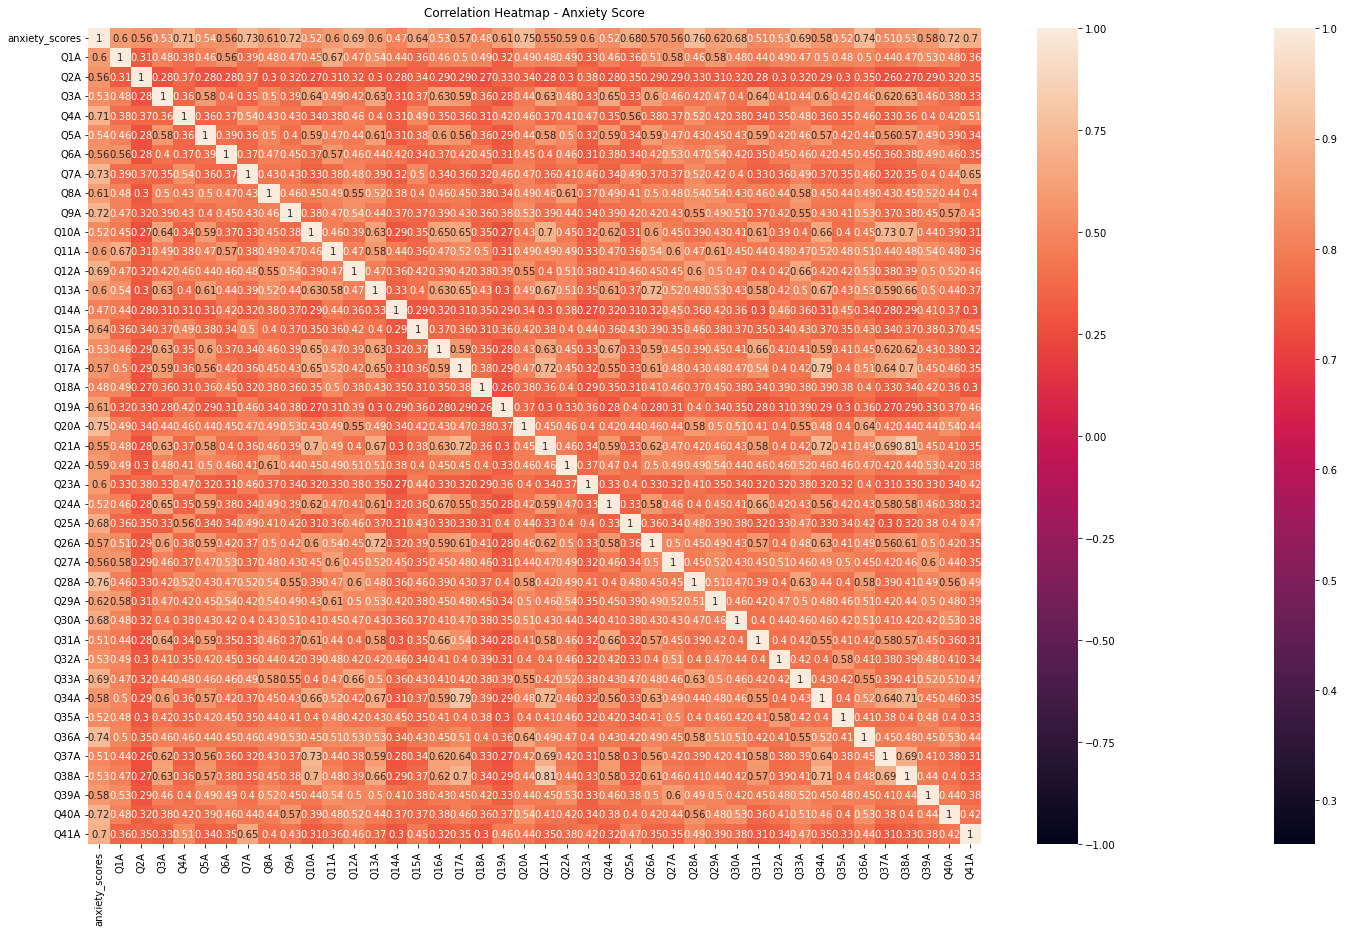

In [107]:
#Heatmap - All Variables against Anxiety Score

plt.figure(figsize=(25,15))
sns.heatmap(anxiety_matrix)
anxiety_heatmap = sns.heatmap(anxiety_matrix, vmin=-1,vmax=1, annot=True)

#title for heatmap
anxiety_heatmap.set_title('Correlation Heatmap - Anxiety Score', fontdict={'fontsize':12}, pad=12); 

In [108]:
#Format dataset to for Stress_scores against 42 Questions

df_stress = data[['stress_scores','Q1A','Q2A','Q3A','Q4A','Q5A','Q6A','Q7A','Q8A','Q9A','Q10A','Q11A','Q12A','Q13A','Q14A','Q15A','Q16A','Q17A','Q18A','Q19A','Q20A','Q21A','Q22A','Q23A','Q24A','Q25A','Q26A','Q27A','Q28A','Q29A','Q30A','Q31A','Q32A','Q33A','Q34A','Q35A','Q36A','Q37A','Q38A','Q39A','Q40A','Q41A']]

,stress_scores,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,...,Q32A,Q33A,Q34A,Q35A,Q36A,Q37A,Q38A,Q39A,Q40A,Q41A
0,54,4,4,2,4,4,4,4,4,2,...,4,2,3,4,4,1,2,4,3,4
1,41,4,1,2,3,4,4,3,4,3,...,3,3,2,2,3,4,2,2,1,2
2,31,3,1,4,1,4,3,1,3,2,...,3,1,4,3,4,4,4,2,2,1
3,30,2,3,2,1,3,3,4,2,3,...,1,2,4,1,1,2,1,3,4,4
4,43,2,2,3,4,4,2,4,4,4,...,4,4,4,3,4,3,3,3,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39770,29,2,1,3,2,3,2,1,3,1,...,1,2,4,1,2,4,4,2,3,1
39771,48,3,4,3,4,3,4,4,4,3,...,3,3,4,3,3,3,4,3,3,3
39772,19,2,1,2,1,1,1,1,1,2,...,1,2,1,1,1,1,1,2,1,1
39773,47,3,1,2,2,3,3,3,4,3,...,3,4,2,3,2,1,2,3,2,4


In [109]:
#Correlation Matrix for Anxiety_scores against 42 Questions
stress_matrix = df_stress.corr(
    method = 'spearman',
    min_periods = 1
)

#.style.background_gradient() adds gradient style for easier correlation understanding
stress_matrix.style.background_gradient()   

,stress_scores,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,Q11A,Q12A,Q13A,Q14A,Q15A,Q16A,Q17A,Q18A,Q19A,Q20A,Q21A,Q22A,Q23A,Q24A,Q25A,Q26A,Q27A,Q28A,Q29A,Q30A,Q31A,Q32A,Q33A,Q34A,Q35A,Q36A,Q37A,Q38A,Q39A,Q40A,Q41A
stress_scores,1.000000,0.766133,0.412058,0.600574,0.537976,0.608613,0.724839,0.540558,0.727056,0.624978,0.564480,0.779083,0.707405,0.667483,0.623497,0.504019,0.577792,0.601246,0.634731,0.445187,0.632703,0.589509,0.724250,0.458842,0.589108,0.511944,0.636157,0.758749,0.658712,0.760422,0.598984,0.565602,0.695762,0.714165,0.606326,0.685787,0.640594,0.542542,0.571537,0.742685,0.616095,0.509491
Q1A,0.766133,1.000000,0.310075,0.475631,0.383639,0.464331,0.560454,0.386351,0.477137,0.471540,0.450097,0.674480,0.467362,0.543846,0.437925,0.364540,0.464860,0.495106,0.486322,0.315471,0.489664,0.476676,0.490858,0.332709,0.462497,0.360411,0.508327,0.577269,0.463749,0.581257,0.484355,0.437868,0.488755,0.469924,0.501378,0.481646,0.498813,0.435316,0.465102,0.529499,0.477736,0.358216
Q2A,0.412058,0.310075,1.000000,0.275811,0.365205,0.278047,0.276610,0.372429,0.300279,0.323303,0.265712,0.307862,0.321511,0.297728,0.284228,0.339556,0.290296,0.288434,0.271073,0.331801,0.336977,0.281181,0.301880,0.377925,0.282430,0.351324,0.293071,0.293178,0.327649,0.312744,0.320125,0.279970,0.300398,0.316138,0.290992,0.299118,0.345618,0.260507,0.270199,0.287955,0.322985,0.352690
Q3A,0.600574,0.475631,0.275811,1.000000,0.358457,0.583997,0.400259,0.347689,0.495529,0.385975,0.636444,0.486180,0.418338,0.633331,0.307064,0.367414,0.630535,0.589595,0.355144,0.281280,0.440993,0.631000,0.483685,0.334515,0.646846,0.327589,0.602531,0.464756,0.417024,0.470893,0.403278,0.637377,0.406335,0.440577,0.598682,0.419508,0.462639,0.616581,0.625921,0.457961,0.383345,0.325183
Q4A,0.537976,0.383639,0.365205,0.358457,1.000000,0.357877,0.366995,0.538597,0.430870,0.426266,0.338781,0.384293,0.464982,0.395946,0.314537,0.492683,0.347529,0.363382,0.312922,0.419229,0.463119,0.368766,0.414329,0.471398,0.349521,0.557157,0.375988,0.370649,0.524896,0.416308,0.377243,0.337268,0.353987,0.477666,0.361372,0.351687,0.456456,0.327538,0.356336,0.400120,0.419478,0.511162
Q5A,0.608613,0.464331,0.278047,0.583997,0.357877,1.000000,0.393891,0.361426,0.497126,0.397400,0.593257,0.469370,0.440161,0.605082,0.312423,0.375206,0.596371,0.561103,0.361176,0.289561,0.438219,0.582737,0.504520,0.324473,0.592858,0.336571,0.591815,0.471845,0.430119,0.451419,0.426157,0.589438,0.421990,0.463768,0.569556,0.424202,0.443586,0.559489,0.570531,0.485272,0.394981,0.337404
Q6A,0.724839,0.560454,0.276610,0.400259,0.366995,0.393891,1.000000,0.369720,0.467009,0.446237,0.368390,0.570791,0.462797,0.444179,0.419940,0.337954,0.369880,0.421463,0.446804,0.309320,0.453423,0.398398,0.461871,0.310788,0.377261,0.340414,0.422157,0.533558,0.474557,0.544977,0.421386,0.353742,0.449989,0.457852,0.423269,0.448279,0.450544,0.357973,0.382317,0.491823,0.463443,0.346651
Q7A,0.540558,0.386351,0.372429,0.347689,0.538597,0.361426,0.369720,1.000000,0.426966,0.434924,0.334112,0.379238,0.481091,0.389760,0.323548,0.502754,0.344088,0.361581,0.315471,0.456243,0.470024,0.360752,0.408118,0.457721,0.338465,0.486898,0.374176,0.370898,0.522774,0.415909,0.402277,0.334340,0.355181,0.485202,0.366603,0.354133,0.463705,0.324279,0.347227,0.402513,0.436773,0.649578
Q8A,0.727056,0.477137,0.300279,0.495529,0.430870,0.497126,0.467009,0.426966,1.000000,0.461005,0.446007,0.485820,0.554014,0.523614,0.375906,0.404884,0.457954,0.445657,0.378664,0.338482,0.489843,0.457227,0.607745,0.366746,0.490127,0.409120,0.495545,0.479947,0.536992,0.541452,0.426084,0.462473,0.442490,0.579074,0.450478,0.435271,0.485125,0.425421,0.446301,0.521000,0.441597,0.397954
Q9A,0.624978,0.471540,0.323303,0.385975,0.426266,0.397400,0.446237,0.434924,0.461005,1.000000,0.380969,0.468460,0.544427,0.444327,0.374420,0.365285,0.387234,0.427215,0.364685,0.375047,0.527263,0.389381,0.439225,0.339074,0.386997,0.416542,0.423123,0.434958,0.553507,0.486585,0.506374,0.374470,0.418442,0.547969,0.431065,0.408125,0.528180,0.37

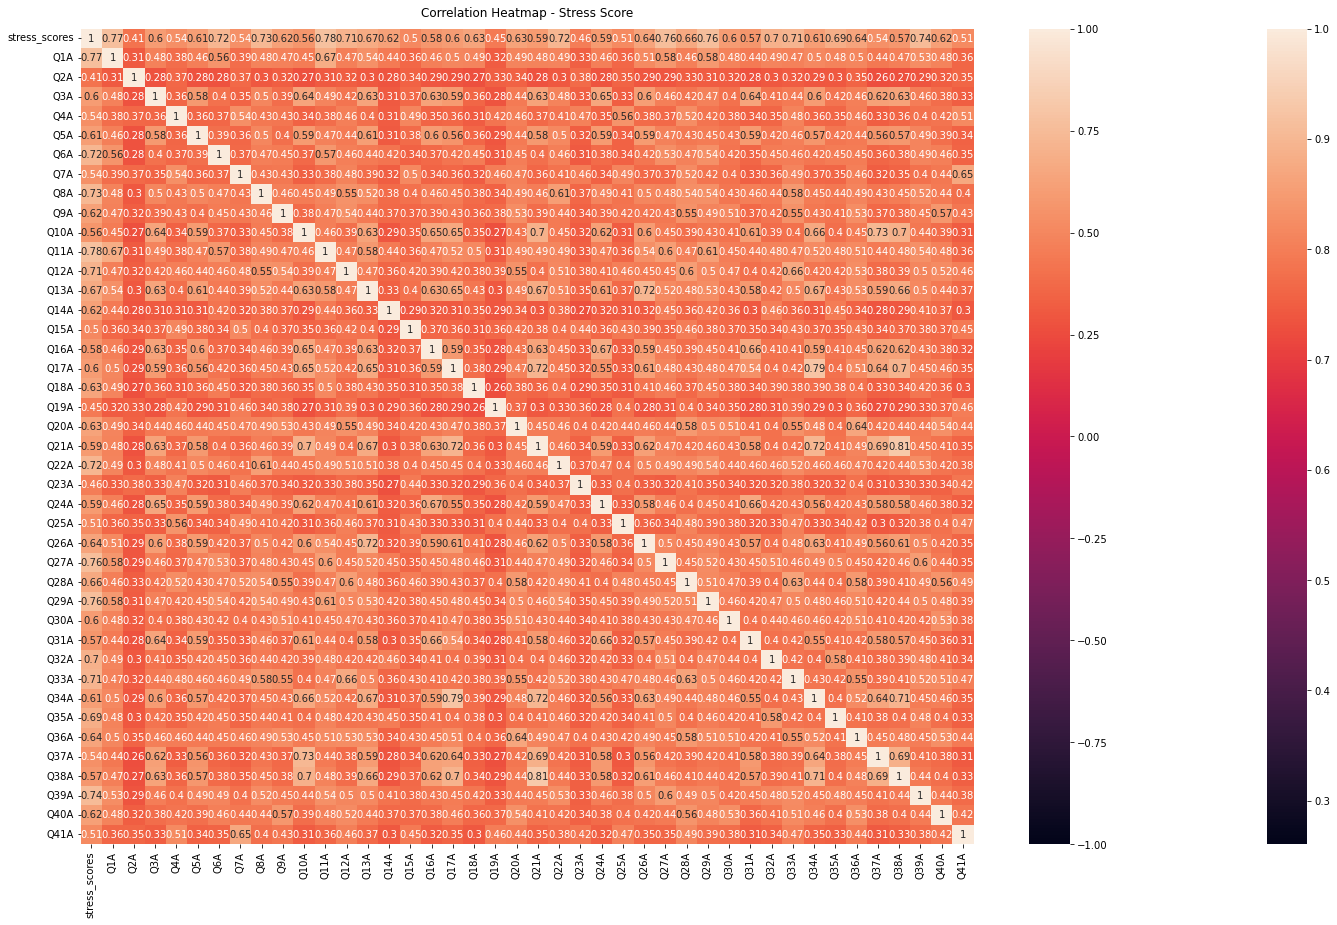

In [110]:
#Heatmap - All Variables against Stress Score

plt.figure(figsize=(25,15))
sns.heatmap(stress_matrix)
stress_heatmap = sns.heatmap(stress_matrix, vmin=-1,vmax=1, annot=True)

#title for heatmap
stress_heatmap.set_title('Correlation Heatmap - Stress Score', fontdict={'fontsize':12}, pad=12); 

### Correlation between Each Question to Depression, Anxiety & Stress Scores

In [111]:
#Extracting correlation values from the respective matrices
depression_df = depression_matrix[['depression_scores']]
anxiety_df = anxiety_matrix[['anxiety_scores']]
stress_df = stress_matrix[['stress_scores']]

#Delete first row which is irrelevant from the correlation matrix
depression_df = depression_df.iloc[1:,:]
anxiety_df = anxiety_df.iloc[1:,:]
stress_df = stress_df.iloc[1:,:]

#Add 41 questions into the data
questions = ['I found myself getting upset by quite trivial things.',' I was aware of dryness of my mouth.','I couldnt seem to experience any positive feeling at all.',' I experienced breathing difficulty eg, excessively rapid breathing, breathlessness in the absence of physical exertion','I just couldnt seem to get going.','I tended to over-react to situations.','I had a feeling of shakiness eg, legs going to give way.','I found it difficult to relax.','I found myself in situations that made me so anxious I was most relieved when they ended.','I felt that I had nothing to look forward to.','I found myself getting upset rather easily.','I felt that I was using a lot of nervous energy.','I felt sad and depressed.','I found myself getting impatient when I was delayed in any way eg, elevators, traffic lights, being kept waiting.','I had a feeling of faintness.','I felt that I had lost interest in just about everything.','I felt I wasnt worth much as a person.','I felt that I was rather touchy.','I perspired noticeably eg, hands sweaty, in the absence of high temperatures or physical exertion.','I felt scared without any good reason.','I felt that life wasnt worthwhile.','I found it hard to wind down.','I had difficulty in swallowing.','I couldnt seem to get any enjoyment out of the things I did.','I was aware of the action of my heart in the absence of physical exertion eg, sense of heart rate increase, heart missing a beat.','I felt down-hearted and blue.','I found that I was very irritable.','I felt I was close to panic.','I found it hard to calm down after something upset me.','I feared that I would be thrown by some trivial but unfamiliar task.','I was unable to become enthusiastic about anything.','I found it difficult to tolerate interruptions to what I was doing.','I was in a state of nervous tension.','I felt I was pretty worthless.','I was intolerant of anything that kept me from getting on with what I was doing.','I felt terrified.','I could see nothing in the future to be hopeful about.','I felt that life was meaningless.','I found myself getting agitated.','I was worried about situations in which I might panic and make a fool of myself.','I experienced trembling (eg, in the hands).']

#Combine the df
depression_df['Questions']=questions
depression_df['anxiety_scores']=anxiety_df
depression_df['stress_scores']=stress_df

#Rearrange column
neworder = ['Questions','depression_scores','anxiety_scores','stress_scores']

#New df with compiled scores
combined_df = depression_df.reindex(columns=neworder)

print('Correlation values for each questions on the variables depression, anxiety and stress respectively')
combined_df

Correlation values for each questions on the variables depression, anxiety and stress respectively


,Questions,depression_scores,anxiety_scores,stress_scores
Q1A,I found myself getting upset by quite trivial ...,0.588393,0.596110,0.766133
Q2A,I was aware of dryness of my mouth.,0.348604,0.559509,0.412058
Q3A,I couldnt seem to experience any positive feel...,0.795485,0.528057,0.600574
Q4A,"I experienced breathing difficulty eg, excess...",0.442266,0.709909,0.537976
Q5A,I just couldnt seem to get going.,0.766695,0.538547,0.608613
Q6A,I tended to over-react to situations.,0.488454,0.559815,0.724839
Q7A,"I had a feeling of shakiness eg, legs going to...",0.437265,0.727023,0.540558
Q8A,I found it difficult to relax.,0.582315,0.613758,0.727056
Q9A,I found myself in situations that made me so a...,0.494752,0.718622,0.624978
Q10A,I felt that I had nothing to look forward to.,0.832233,0.516964,0.564480


In [112]:
#Top 5 questions with highest correlation value for each variable Depression, Anxiety, Stress

top5_D = combined_df.sort_values(by=['depression_scores'],ascending=False)
top5_D2 = top5_D.head()


def highlight_cols(s):
    color = 'grey'
    return 'background-color: %s' % color


top5_D2.style.applymap(highlight_cols, subset=pd.IndexSlice[:,['depression_scores']])

,Questions,depression_scores,anxiety_scores,stress_scores
Q21A,I felt that life wasnt worthwhile.,0.847682,0.551932,0.589509
Q38A,I felt that life was meaningless.,0.840579,0.532867,0.571537
Q10A,I felt that I had nothing to look forward to.,0.832233,0.516964,0.564480
Q34A,I felt I was pretty worthless.,0.825260,0.575123,0.606326
Q13A,I felt sad and depressed.,0.817989,0.597368,0.667483


In [113]:
top5_A = combined_df.sort_values(by=['anxiety_scores'],ascending=False)
top5_A.head()

top5_A2 = top5_A.head()
def highlight_cols(s):
    color = 'grey'
    return 'background-color: %s' % color


top5_A2.style.applymap(highlight_cols, subset=pd.IndexSlice[:,['anxiety_scores']])

,Questions,depression_scores,anxiety_scores,stress_scores
Q28A,I felt I was close to panic.,0.518973,0.764132,0.658712
Q20A,I felt scared without any good reason.,0.551530,0.747737,0.632703
Q36A,I felt terrified.,0.581373,0.743744,0.640594
Q7A,"I had a feeling of shakiness eg, legs going to give way.",0.437265,0.727023,0.540558
Q40A,I was worried about situations in which I might panic and make a fool of myself.,0.503279,0.724137,0.616095


In [114]:
top5_S = combined_df.sort_values(by=['stress_scores'],ascending=False)
top5_S.head()

top5_S2 = top5_S.head()
def highlight_cols(s):
    color = 'grey'
    return 'background-color: %s' % color


top5_S2.style.applymap(highlight_cols, subset=pd.IndexSlice[:,['stress_scores']])

,Questions,depression_scores,anxiety_scores,stress_scores
Q11A,I found myself getting upset rather easily.,0.604951,0.596305,0.779083
Q1A,I found myself getting upset by quite trivial things.,0.588393,0.596110,0.766133
Q29A,I found it hard to calm down after something upset me.,0.566905,0.621183,0.760422
Q27A,I found that I was very irritable.,0.580540,0.558877,0.758749
Q39A,I found myself getting agitated.,0.567245,0.579114,0.742685


### Correlation Summary

In [115]:
#Summary
print ('Observations:')
print ('- There are strong correlations between all variables Depression, Anxiety, and Stress; Anxiety and Stress showing strongest positive correlations')
print ('- Anxiety & Stress pair showing strongest positive correlations and relationship as they also having the highest coefficient of determination, R squared')

Observations:
- There are strong correlations between all variables Depression, Anxiety, and Stress; Anxiety and Stress showing strongest positive correlations
- Anxiety & Stress pair showing strongest positive correlations and relationship as they also having the highest coefficient of determination, R squared


<a class="anchor" id="question_4"></a>

# Question 4

### Which individuals are going to undergo depression, anxiety or stress in the future?

In [170]:
df = temp
label_encoder = LabelEncoder()
df['major'] = label_encoder.fit_transform(df['major'])
df['country'] = label_encoder.fit_transform(df['country'])

In [171]:
X_depression = df.drop(['depression_scores','anxiety_scores','stress_scores','depression_status', 'anxiety_status', 'stress_status'], axis=1)

## Depression Status Prediction

In [172]:
Y_depression = df['depression_status']

In [173]:
pd.unique(Y_depression)

array(['Extremely Severe', 'Severe', 'Moderate'], dtype=object)

In [174]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_depression, Y_depression, test_size=0.2, stratify=Y_depression, random_state=123)

In [175]:
Xtrain.shape

(31820, 127)

In [176]:
Xtest.shape

(7955, 127)

In [177]:
ytrain.shape

(31820,)

In [178]:
ytest.shape

(7955,)

In [179]:
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_pred = model.predict(Xtest)
accuracy_score(ytest, y_pred)

0.8365807668133249

In [180]:
confusion_matrix(ytest, y_pred)

array([[4562,    0,  864],
       [   6, 1000,  209],
       [  86,  135, 1093]])

In [181]:
print(classification_report(ytest, y_pred))

                  precision    recall  f1-score   support

Extremely Severe       0.98      0.84      0.91      5426
        Moderate       0.88      0.82      0.85      1215
          Severe       0.50      0.83      0.63      1314

        accuracy                           0.84      7955
       macro avg       0.79      0.83      0.79      7955
    weighted avg       0.89      0.84      0.85      7955



In [182]:
dt = DecisionTreeClassifier(criterion='gini', random_state=1)
dt.fit(Xtrain, ytrain)
y_pred = dt.predict(Xtest)
accuracy_score(ytest, y_pred)

0.8873664362036455

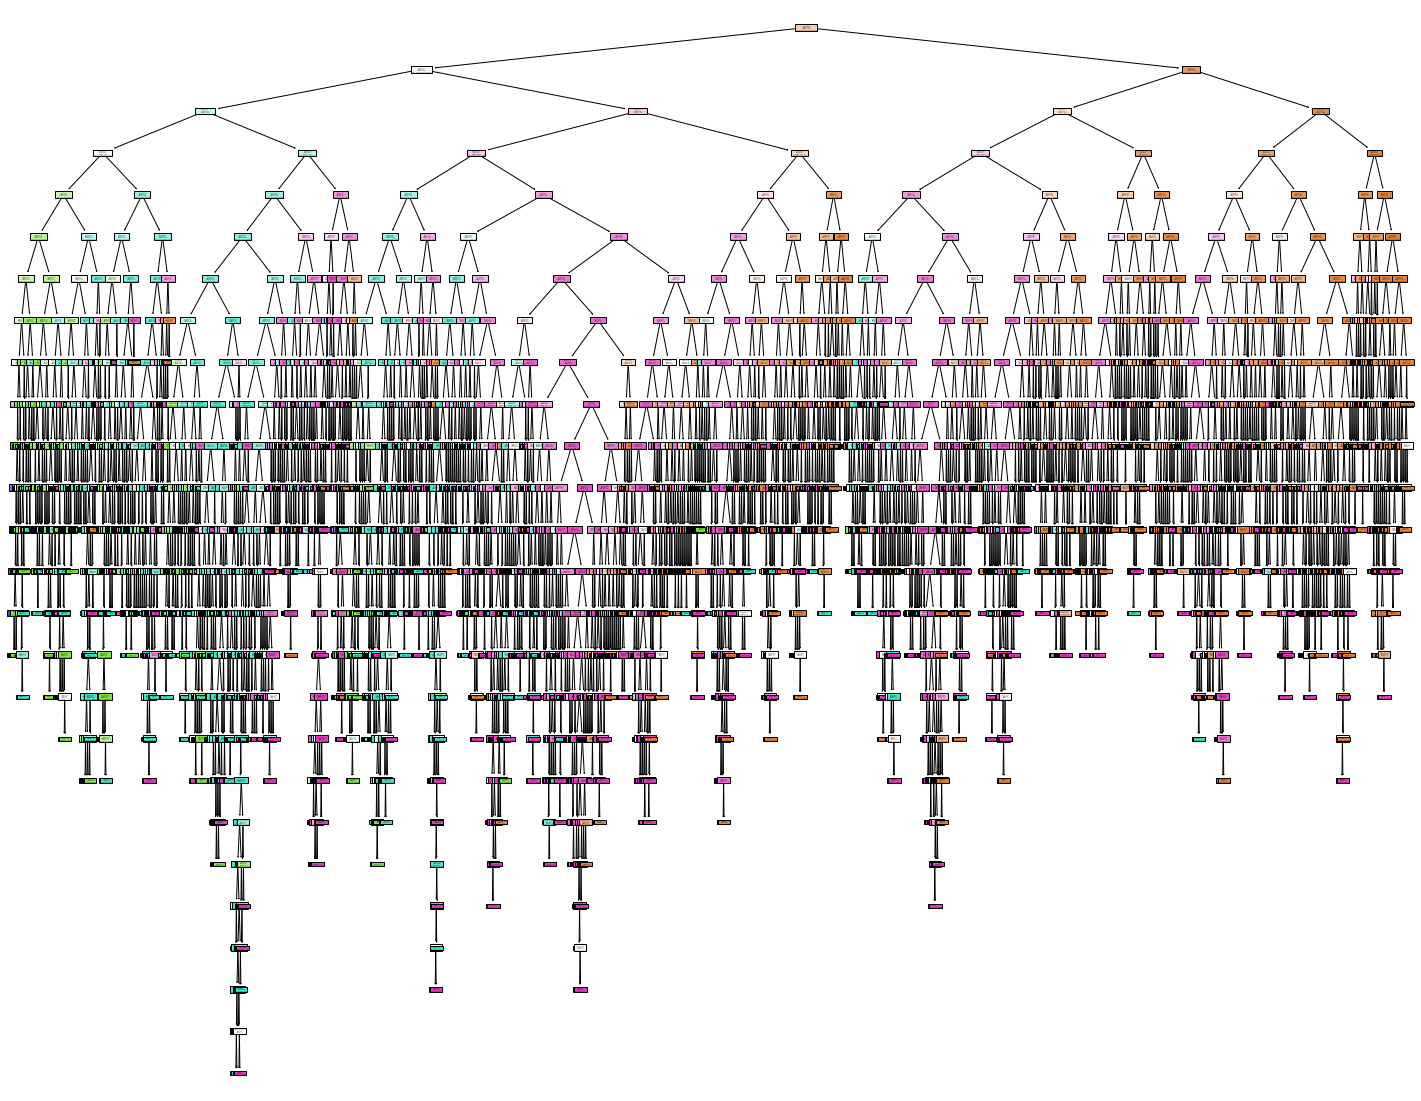

In [214]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt, filled=True)

In [216]:
text_representation = tree.export_text(dt)
print(text_representation)

|--- feature_20 <= 2.50
|   |--- feature_42 <= 1.50
|   |   |--- feature_20 <= 1.50
|   |   |   |--- feature_10 <= 1.50
|   |   |   |   |--- feature_22 <= 1.50
|   |   |   |   |   |--- feature_26 <= 1.50
|   |   |   |   |   |   |--- feature_62 <= 1.50
|   |   |   |   |   |   |   |--- feature_34 <= 1.50
|   |   |   |   |   |   |   |   |--- feature_56 <= 1.50
|   |   |   |   |   |   |   |   |   |--- feature_64 <= 1.50
|   |   |   |   |   |   |   |   |   |   |--- feature_76 <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |   |--- feature_76 >  1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |--- feature_64 >  1.50
|   |   |   |   |   |   |   |   |   |   |--- class: Mild
|   |   |   |   |   |   |   |   |--- feature_56 >  1.50
|   |   |   |   |   |   |   |   |   |--- feature_64 <= 2.50
|   |   |   |   |   |   |   |   |   |   |--- feature_61 <= 41.50


In [183]:
log_reg = LogisticRegression().fit(Xtrain, ytrain)
y_predicted = log_reg.predict(Xtest)
accuracy_score(ytest, y_predicted)

/home/prasanta/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.825267127592709

In [184]:
model3 = svm.SVC(decision_function_shape='ovo')
model3.fit(Xtrain, ytrain)
y_predicted = dt.predict(Xtest)
accuracy_score(ytest, y_predicted)

0.8873664362036455

In [185]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(Xtrain, ytrain)
y_pred = clf.predict(Xtest)
accuracy_score(ytest, y_pred)

0.9552482715273413

In [186]:
model4 = KNeighborsClassifier(n_neighbors=7)
model4.fit(Xtrain, ytrain)
y_result = model4.predict(Xtest)
accuracy_score(ytest, y_result)

0.6584538026398492

In [187]:
xg_cl = xgb.XGBClassifier(n_estimators=100, seed=123)
xg_cl.fit(Xtrain, ytrain)
y_predicted = xg_cl.predict(Xtest)
accuracy_score(ytest, y_predicted)

/home/prasanta/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:58:38] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9810182275298555

### Depression Result

| Model | Accuracy |
| --- | ----------- |
| Naive Bayes Theorem | 83.66% |
| Decision Tree | 88.74% |
| Logistic Regression | 82.53% |
| Support Vector Machine | 88.74% |
| **Random Forest** | **95.52%** |
| K-Nearest Neighbour Classifier | 65.85% |
| **XGBoost** | **98.10%** |

## Anxiety Status Prediction

In [188]:
Y_depression = df['anxiety_status']

In [189]:
pd.unique(Y_depression)

array(['Extremely Severe', 'Severe', 'Moderate'], dtype=object)

In [190]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_depression, Y_depression, test_size=0.2, stratify=Y_depression, random_state=123)

In [191]:
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_pred = model.predict(Xtest)
accuracy_score(ytest, y_pred)

0.8877435575109994

In [192]:
dt = DecisionTreeClassifier(criterion='gini', random_state=1)
dt.fit(Xtrain, ytrain)
y_pred = dt.predict(Xtest)
accuracy_score(ytest, y_pred)

0.9406662476429918

In [193]:
log_reg = LogisticRegression().fit(Xtrain, ytrain)
y_predicted = log_reg.predict(Xtest)
accuracy_score(ytest, y_predicted)

/home/prasanta/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8883720930232558

In [194]:
model3 = svm.SVC(decision_function_shape='ovo')
model3.fit(Xtrain, ytrain)
y_predicted = dt.predict(Xtest)
accuracy_score(ytest, y_predicted)

0.9406662476429918

In [195]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(Xtrain, ytrain)
y_pred = clf.predict(Xtest)
accuracy_score(ytest, y_pred)

0.956882463859208

In [196]:
model4 = KNeighborsClassifier(n_neighbors=7)
model4.fit(Xtrain, ytrain)
y_result = model4.predict(Xtest)
accuracy_score(ytest, y_result)

0.8207416719044626

In [197]:
xg_cl = xgb.XGBClassifier(n_estimators=100, seed=123)
xg_cl.fit(Xtrain, ytrain)
y_predicted = xg_cl.predict(Xtest)
accuracy_score(ytest, y_predicted)

/home/prasanta/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:59:57] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9893148962916405

### Anxiety Result

| Model | Accuracy |
| --- | ----------- |
| Naive Bayes Theorem | 88.77% |
| Decision Tree | 94.07% |
| Logistic Regression | 88.84% |
| Support Vector Machine | 94.07% |
| **Random Forest** | **95.69%** |
| K-Nearest Neighbour Classifier | 82.07% |
| **XGBoost** | **98.93%** |

## Stress Status Prediction

In [198]:
Y_depression = df['stress_status']

In [199]:
pd.unique(Y_depression)

array(['Extremely Severe', 'Severe', 'Moderate', 'Normal', 'Mild'],
      dtype=object)

In [200]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_depression, Y_depression, test_size=0.2, stratify=Y_depression, random_state=123)

In [201]:
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_pred = model.predict(Xtest)
accuracy_score(ytest, y_pred)

0.7778755499685732

In [305]:
dt = DecisionTreeClassifier(criterion='gini', random_state=1)
dt.fit(Xtrain, ytrain)
y_pred = dt.predict(Xtest)
accuracy_score(ytest, y_pred)

0.801759899434318

In [203]:
log_reg = LogisticRegression().fit(Xtrain, ytrain)
y_predicted = log_reg.predict(Xtest)
accuracy_score(ytest, y_predicted)

/home/prasanta/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.619610307982401

In [204]:
model3 = svm.SVC(decision_function_shape='ovo')
model3.fit(Xtrain, ytrain)
y_predicted = dt.predict(Xtest)
accuracy_score(ytest, y_predicted)

0.801759899434318

In [205]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(Xtrain, ytrain)
y_pred = clf.predict(Xtest)
accuracy_score(ytest, y_pred)

0.9027027027027027

In [206]:
model4 = KNeighborsClassifier(n_neighbors=7)
model4.fit(Xtrain, ytrain)
y_result = model4.predict(Xtest)
accuracy_score(ytest, y_result)

0.5148962916404777

In [207]:
xg_cl = xgb.XGBClassifier(n_estimators=100, seed=123)
xg_cl.fit(Xtrain, ytrain)
y_predicted = xg_cl.predict(Xtest)
accuracy_score(ytest, y_predicted)

/home/prasanta/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:02:37] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9689503456945318

### Stress Result

| Model | Accuracy |
| --- | ----------- |
| Naive Bayes Theorem | 77.79% |
| Decision Tree | 80.18% |
| Logistic Regression | 61.96% |
| Support Vector Machine | 80.17% |
| **Random Forest** | **90.27%** |
| K-Nearest Neighbour Classifier | 51.49% |
| **XGBoost** | **96.89%** |

## Future Works

* Checking if there's any posibility of having overfit model and then addressing it if there's an issue
* Integrating this model with Social Media data
* Considering better evaluation metrics like Recall
* Developing a recommender system or "automated" system that integrating developed models
* Involving 'TPI' questions
* Optimising the Decision Tree Classifier by setting a limit to max_depth value

<a class="anchor" id="ref"></a>

## References

<html>

<head>
<meta http-equiv=Content-Type content="text/html; charset=windows-1252">
<meta name=Generator content="Microsoft Word 15 (filtered)">
<style>
<!--
 /* Font Definitions */
 @font-face
	{font-family:"Cambria Math";
	panose-1:2 4 5 3 5 4 6 3 2 4;}
 /* Style Definitions */
 p
	{margin-right:0in;
	margin-left:0in;
	font-size:12.0pt;
	font-family:"Times New Roman",serif;}
.MsoChpDefault
	{font-family:"Calibri",sans-serif;}
.MsoPapDefault
	{margin-bottom:8.0pt;
	line-height:107%;}
@page WordSection1
	{size:595.3pt 841.9pt;
	margin:1.0in 1.0in 1.0in 1.0in;}
div.WordSection1
	{page:WordSection1;}
-->
</style>

</head>

<body lang=EN-US style='word-wrap:break-word'>

<div class=WordSection1>

<p style='margin-left:28.35pt;text-indent:-28.35pt'><span lang=EN-MY>Ay-Woan,
P., Sarah, C. P. Y., LyInn, C., Tsyr-Jang, C., &amp; Ping-Chuan, H. (2006).
Quality of life in depression: Predictive Models. <i>Quality of Life Research</i>,
<i>15</i>(1), 39–48. https://doi.org/10.1007/s11136-005-0381-x </span></p>

<p style='margin-left:28.35pt;text-indent:-28.35pt'><span lang=EN-MY>Elbay, R.
Y., Kurtulmu&#351;, A., Arpac&#305;o&#287;lu, S., &amp; Karadere, E. (2020).
Depression, anxiety, stress levels of physicians and associated factors in
covid-19 pandemics. <i>Psychiatry Research</i>, <i>290</i>, 113130. https://doi.org/10.1016/j.psychres.2020.113130
</span></p>

<p style='margin-left:28.35pt;text-indent:-28.35pt'><span lang=EN-MY>Gao, W.,
Ping, S., &amp; Liu, X. (2020). Gender differences in depression, anxiety, and
stress among college students: A longitudinal study from China. <i>Journal of
Affective Disorders</i>, <i>263</i>, 292–300. https://doi.org/10.1016/j.jad.2019.11.121
</span></p>

<p style='margin-left:28.35pt;text-indent:-28.35pt'><span lang=EN-MY>Lew, B.,
Huen, J., Yu, P., Yuan, L., Wang, D.-F., Ping, F., Abu Talib, M., Lester, D.,
&amp; Jia, C.-X. (2019). Associations between depression, anxiety, stress,
hopelessness, subjective well-being, coping styles and suicide in Chinese
University students. <i>PLOS ONE</i>, <i>14</i>(7).
https://doi.org/10.1371/journal.pone.0217372 </span></p>

<p style='margin-left:28.35pt;text-indent:-28.35pt'><span lang=EN-MY>Reece, A.
G., &amp; Danforth, C. M. (2017). Instagram photos reveal predictive markers of
depression. <i>EPJ Data Science</i>, <i>6</i>(1).
https://doi.org/10.1140/epjds/s13688-017-0110-z </span></p>

<p style='margin-left:28.35pt;text-indent:-28.35pt'><span lang=EN-MY>Shah, S.
M., Mohammad, D., Qureshi, M. F., Abbas, M. Z., &amp; Aleem, S. (2020).
Prevalence, psychological responses and associated correlates of depression,
anxiety and stress in a global population, during the coronavirus disease
(covid-19) pandemic. <i>Community Mental Health Journal</i>, <i>57</i>(1),
101–110. https://doi.org/10.1007/s10597-020-00728-y</span></p>

</div>

</body>

</html>